# Laboratorium 7: Restricted Boltzmann Machines i Deep Belief Networks
### Katarzyna Główczyk

## Zbiory danych

- MNIST Handwritten Digits
- Fashion-MNIST, Hugging Face Fashion-MNIST
- Kuzushiji-MNIST (również Kuzushiji-49)

## Ekstrakcja cech za pomocą Restricted Boltzmann Machine

Eksperymenty w tym zadaniu należy wykonać dla wszystkich zbiorów danych wymienionych w punkcie 3, przy czym obowiązkowe są zbiory MNIST i Fashion-MNIST.

- Wczytaj zbiór danych. Są to obrazy w skali szarości, przypisane do jednej z wielu
klas, z pre-definiowanym podziałem na zbiór treningowy i testowy (w przypadku
MNIST oraz Fashion-MNIST jest to 60000 rekordów treningowych i 10000 testowych).

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12808124.86it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 338863.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3212042.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3971342.25it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 26421880/26421880 [00:00<00:00, 113381668.43it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 3808956.11it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 61613311.85it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12937254.04it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 18165135/18165135 [00:18<00:00, 985353.94it/s] 


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 132817.09it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:04<00:00, 710566.78it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 13962832.56it/s]


Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw

MNIST: 60000 train, 10000 test
Fashion-MNIST: 60000 train, 10000 test
Kuzushiji-MNIST: 60000 train, 10000 test


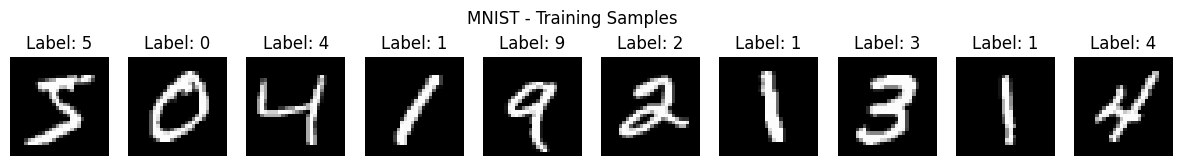

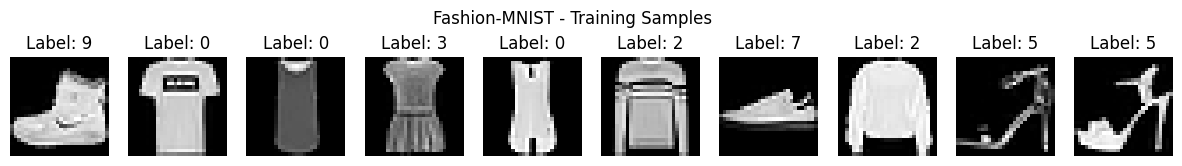

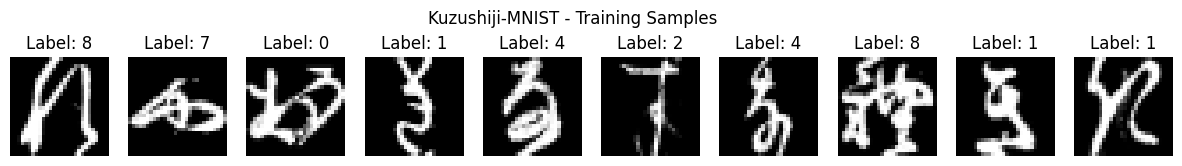

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

data_dir = "./data"

transform = transforms.Compose([
    transforms.ToTensor()
])

mnist_train = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root=data_dir, train=False, download=True, transform=transform)

fashion_mnist_train = datasets.FashionMNIST(root=data_dir, train=True, download=True, transform=transform)
fashion_mnist_test = datasets.FashionMNIST(root=data_dir, train=False, download=True, transform=transform)

kuzushiji_train = datasets.KMNIST(root=data_dir, train=True, download=True, transform=transform)
kuzushiji_test = datasets.KMNIST(root=data_dir, train=False, download=True, transform=transform)

print(f"MNIST: {len(mnist_train)} train, {len(mnist_test)} test")
print(f"Fashion-MNIST: {len(fashion_mnist_train)} train, {len(fashion_mnist_test)} test")
print(f"Kuzushiji-MNIST: {len(kuzushiji_train)} train, {len(kuzushiji_test)} test")

def show_samples(dataset, title, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 2))
    for i, ax in enumerate(axes):
        img, label = dataset[i]
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(f"Label: {label}")
        ax.axis("off")
    plt.suptitle(title)
    plt.show()

show_samples(mnist_train, "MNIST - Training Samples")
show_samples(fashion_mnist_train, "Fashion-MNIST - Training Samples")
show_samples(kuzushiji_train, "Kuzushiji-MNIST - Training Samples")

- Dokonaj binaryzacji obrazów (zarówno zbiór treningowy, jak i testowy), a następnie wyświel 10 przykładowych rekordów ze zbioru treningowego.

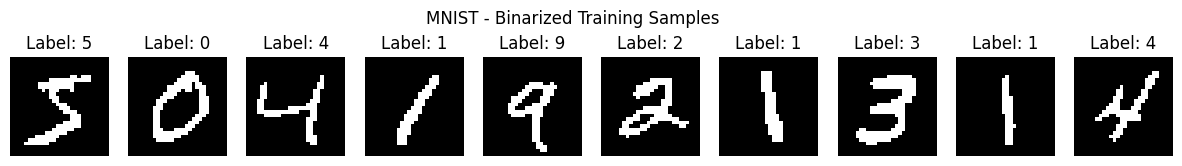

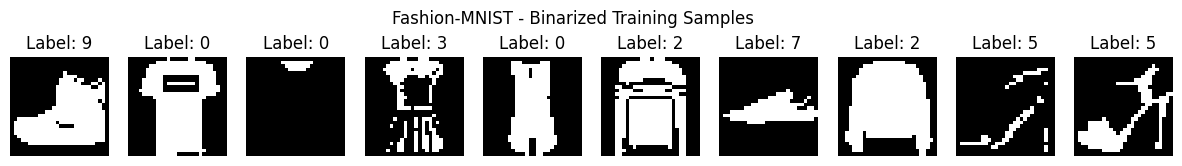

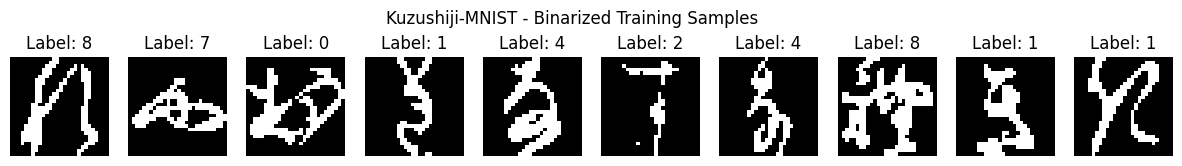

In [2]:
import numpy as np

def binarize_images(dataset, threshold=0.5):
    binary_data = []
    binary_labels = []
    for img, label in dataset:
        binary_img = (img.numpy() > threshold).astype(np.float32)
        binary_data.append(binary_img)
        binary_labels.append(label)
    return np.array(binary_data), np.array(binary_labels)

mnist_train_data, mnist_train_labels = binarize_images(mnist_train)
mnist_test_data, mnist_test_labels = binarize_images(mnist_test)

fashion_train_data, fashion_train_labels = binarize_images(fashion_mnist_train)
fashion_test_data, fashion_test_labels = binarize_images(fashion_mnist_test)

kuzushiji_train_data, kuzushiji_train_labels = binarize_images(kuzushiji_train)
kuzushiji_test_data, kuzushiji_test_labels = binarize_images(kuzushiji_test)

def show_binary_samples(data, labels, title, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 2))
    for i, ax in enumerate(axes):
        ax.imshow(data[i].squeeze(), cmap="gray")
        ax.set_title(f"Label: {labels[i]}")
        ax.axis("off")
    plt.suptitle(title)
    plt.show()

show_binary_samples(mnist_train_data, mnist_train_labels, "MNIST - Binarized Training Samples")
show_binary_samples(fashion_train_data, fashion_train_labels, "Fashion-MNIST - Binarized Training Samples")
show_binary_samples(kuzushiji_train_data, kuzushiji_train_labels, "Kuzushiji-MNIST - Binarized Training Samples")

- Dokonaj konwersji danych na tablice numpy

In [7]:
import torch
from torchvision import datasets, transforms
import numpy as np

data_dir = "./data"
transform = transforms.Compose([
    transforms.ToTensor()  
])

mnist_train = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root=data_dir, train=False, download=True, transform=transform)

fashion_mnist_train = datasets.FashionMNIST(root=data_dir, train=True, download=True, transform=transform)
fashion_mnist_test = datasets.FashionMNIST(root=data_dir, train=False, download=True, transform=transform)

kuzushiji_train = datasets.KMNIST(root=data_dir, train=True, download=True, transform=transform)
kuzushiji_test = datasets.KMNIST(root=data_dir, train=False, download=True, transform=transform)

def dataset_to_numpy(dataset):
    data = []
    labels = []
    for img, label in dataset:
        data.append(img.numpy().flatten())  
        labels.append(label)
    return np.array(data, dtype=np.float32), np.array(labels, dtype=np.int64)

mnist_train_data, mnist_train_labels = dataset_to_numpy(mnist_train)
mnist_test_data, mnist_test_labels = dataset_to_numpy(mnist_test)

fashion_train_data, fashion_train_labels = dataset_to_numpy(fashion_mnist_train)
fashion_test_data, fashion_test_labels = dataset_to_numpy(fashion_mnist_test)

kuzushiji_train_data, kuzushiji_train_labels = dataset_to_numpy(kuzushiji_train)
kuzushiji_test_data, kuzushiji_test_labels = dataset_to_numpy(kuzushiji_test)

print("MNIST:")
print(f"Train data shape: {mnist_train_data.shape}, Train labels shape: {mnist_train_labels.shape}")
print(f"Test data shape: {mnist_test_data.shape}, Test labels shape: {mnist_test_labels.shape}")

print("\nFashion-MNIST:")
print(f"Train data shape: {fashion_train_data.shape}, Train labels shape: {fashion_train_labels.shape}")
print(f"Test data shape: {fashion_test_data.shape}, Test labels shape: {fashion_test_labels.shape}")

print("\nKuzushiji-MNIST:")
print(f"Train data shape: {kuzushiji_train_data.shape}, Train labels shape: {kuzushiji_train_labels.shape}")
print(f"Test data shape: {kuzushiji_test_data.shape}, Test labels shape: {kuzushiji_test_labels.shape}")


MNIST:
Train data shape: (60000, 784), Train labels shape: (60000,)
Test data shape: (10000, 784), Test labels shape: (10000,)

Fashion-MNIST:
Train data shape: (60000, 784), Train labels shape: (60000,)
Test data shape: (10000, 784), Test labels shape: (10000,)

Kuzushiji-MNIST:
Train data shape: (60000, 784), Train labels shape: (60000,)
Test data shape: (10000, 784), Test labels shape: (10000,)


- Zbuduj Pipeline złożony z:
    1. BernoulliRBM do ekstrakcji cech
    2. LogisticRegression jako klasyfikatora


- Dostrój hiperparametry modelu korzystając z wyszukiwania siatkowego i walidacji
krzyżowej (GridSearchCV). Siatkę parametrów możesz dobrać stosowanie do zbioru danych i dostępnych zasobów obliczeniowych.

- Przedstaw i skomentuj otrzymane wartości hiperparametrów, a następnie wytrenuj
zgodnie z nimi RBM i klasyfikator.

W celu przeprowadzenia eksperymentów wykorzystano mniejsze próbki zbiorów danych treningowych i testowych (odpowiednio 10,000 przykładów do treningu i 1,000 przykładów do testów). Decyzja ta została podjęta w związku z ograniczeniami czasowymi oraz zasobami obliczeniowymi, które były dostępne na etapie implementacji.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

datasets = {
    "MNIST": (mnist_train_data, mnist_train_labels),
    "Fashion-MNIST": (fashion_train_data, fashion_train_labels),
    "Kuzushiji-MNIST": (kuzushiji_train_data, kuzushiji_train_labels)
}

pipeline = Pipeline(steps=[ 
    ('rbm', BernoulliRBM(random_state=42)), 
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))  
])

param_grid = {
    'rbm__n_components': [70, 80, 90],  
    'rbm__learning_rate': [0.05, 0.08, 0.1], 
    'rbm__batch_size': [10, 20],  
    'logreg__C': [0.1, 0.5, 1.0]  
}

results = {}
best_params = {}
trained_models = {}
sample_size = 10000

for dataset_name, (X, y) in datasets.items():
    print(f"\n=== Przetwarzanie zbioru danych: {dataset_name} ===")
    
    X_sample = X[:sample_size]
    y_sample = y[:sample_size]
    
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
    grid_search.fit(X_sample, y_sample)
    
    best_params[dataset_name] = grid_search.best_params_
    results[dataset_name] = {
        "Best Params": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }
    
    print(f"Najlepsze parametry dla {dataset_name}: {grid_search.best_params_}")
    print(f"Najlepsza dokładność (accuracy): {grid_search.best_score_}")
    
    params = grid_search.best_params_
    final_pipeline = Pipeline(steps=[
        ('rbm', BernoulliRBM(
            random_state=42,
            n_components=params['rbm__n_components'],
            learning_rate=params['rbm__learning_rate'],
            batch_size=params['rbm__batch_size']
        )),
        ('logreg', LogisticRegression(
            max_iter=1000,
            random_state=42,
            C=params['logreg__C']
        ))
    ])
    final_pipeline.fit(X_sample, y_sample)
    trained_models[dataset_name] = final_pipeline
    print(f"Model dla {dataset_name} wytrenowany.")

print("\n=== Podsumowanie wyników ===")
for dataset_name, result in results.items():
    print(f"{dataset_name} -> Najlepsze parametry: {result['Best Params']}, Najlepsza dokładność: {result['Best Score']}")


=== Przetwarzanie zbioru danych: MNIST ===
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=70; total time=   6.2s
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=70; total time=   6.0s
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=70; total time=   6.3s
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=80; total time=   6.3s
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=80; total time=   6.4s
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=80; total time=   6.4s
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=90; total time=   7.1s
[CV] END logreg__C=0.1, rbm__batch_size=10, rbm__learning_rate=0.05, rbm__n_components=90; total time=   7.0s
[CV] END logre

Dzięki dostrojeniu hiperparametrów ustalono, że liczba komponentów RBM wynosząca 90 i współczynnik uczenia 0.05 sprawdzają się najlepiej we wszystkich zbiorach danych. Dla MNIST uzyskano dokładność 91,83% przy C=0.5 i rozmiarze partii 20. W Fashion-MNIST najlepsza dokładność to 78,94%, osiągnięta przy C=1.0 i tej samej wielkości partii. Z kolei w Kuzushiji-MNIST uzyskano wynik 83,57% przy C=0.5 i mniejszym rozmiarze partii wynoszącym 10. Wyniki pokazują, że pipeline oparty na RBM i regresji logistycznej dobrze radzi sobie z różnymi typami danych, choć parametry muszą być dopasowane do specyfiki zbioru.

- Dokonaj klasyfikacji na zbiorze testowym i przedstaw szczegółowo wyniki (accuracy, precision, recall, f1-score):
    1. Na poziomie każdej klasy
    2. Zbiorcze

In [6]:
from sklearn.metrics import classification_report, accuracy_score

test_sample_size = 1000

test_datasets = {
    "MNIST": (mnist_test_data, mnist_test_labels),
    "Fashion-MNIST": (fashion_test_data, fashion_test_labels),
    "Kuzushiji-MNIST": (kuzushiji_test_data, kuzushiji_test_labels)
}

for dataset_name, (X_test, y_test) in test_datasets.items():
    print(f"\n=== Wyniki dla zbioru testowego: {dataset_name} ===")
    
    X_test_sample = X_test[:test_sample_size]
    y_test_sample = y_test[:test_sample_size]
    
    model = trained_models[dataset_name]
    
    y_pred = model.predict(X_test_sample)

    accuracy = accuracy_score(y_test_sample, y_pred)
    print(f"Dokładność (accuracy): {accuracy:.4f}")
    
    print("\nRaport klasyfikacji (per klasa):")
    print(classification_report(y_test_sample, y_pred, zero_division=0))



=== Wyniki dla zbioru testowego: MNIST ===
Dokładność (accuracy): 0.9080

Raport klasyfikacji (per klasa):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        85
           1       0.98      0.99      0.99       126
           2       0.93      0.88      0.90       116
           3       0.89      0.88      0.88       107
           4       0.92      0.90      0.91       110
           5       0.90      0.84      0.87        87
           6       0.91      0.92      0.91        87
           7       0.92      0.92      0.92        99
           8       0.82      0.88      0.85        89
           9       0.85      0.87      0.86        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000


=== Wyniki dla zbioru testowego: Fashion-MNIST ===
Dokładność (accuracy): 0.8060

Raport klasyfikacji (per klasa):
              pre

- Czy nieliniowa ekstrakcja cech za pomocą RBM poprawia wyniki klasyfikacji w
porównaniu z baseline (regresja logistyczna na surowych pikselach)?

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

test_sample_size = 1000

baseline_results = {}

for dataset_name, (X, y) in datasets.items():
    print(f"\n=== Trenowanie baseline dla: {dataset_name} ===")

    X_sample = X[:sample_size]
    y_sample = y[:sample_size]

    baseline_model = LogisticRegression(max_iter=5000, random_state=42)
    baseline_model.fit(X_sample, y_sample)  

    X_test_sample = test_datasets[dataset_name][0][:test_sample_size]
    y_test_sample = test_datasets[dataset_name][1][:test_sample_size]

    y_pred = baseline_model.predict(X_test_sample)

    accuracy = accuracy_score(y_test_sample, y_pred)

    baseline_results[dataset_name] = {"accuracy": accuracy}
    print(f"Dokładność (accuracy) baseline dla {dataset_name}: {accuracy:.4f}")



=== Trenowanie baseline dla: MNIST ===
Dokładność (accuracy) baseline dla MNIST: 0.8790

=== Trenowanie baseline dla: Fashion-MNIST ===
Dokładność (accuracy) baseline dla Fashion-MNIST: 0.8460

=== Trenowanie baseline dla: Kuzushiji-MNIST ===
Dokładność (accuracy) baseline dla Kuzushiji-MNIST: 0.6490


In [12]:
for dataset_name in datasets.keys():
    baseline_acc = baseline_results[dataset_name]["accuracy"]
    rbm_acc = results[dataset_name]["Best Score"]
    
    print(f"\nPorównanie wyników dla {dataset_name}:")
    print(f"Baseline (Logistic Regression na surowych pikselach): {baseline_acc:.4f}")
    print(f"RBM + Logistic Regression: {rbm_acc:.4f}")
    
    improvement = rbm_acc - baseline_acc
    print(f"Poprawa wyników dzięki RBM: {improvement:.4f}")


Porównanie wyników dla MNIST:
Baseline (Logistic Regression na surowych pikselach): 0.8790
RBM + Logistic Regression: 0.9183
Poprawa wyników dzięki RBM: 0.0393

Porównanie wyników dla Fashion-MNIST:
Baseline (Logistic Regression na surowych pikselach): 0.8460
RBM + Logistic Regression: 0.7894
Poprawa wyników dzięki RBM: -0.0566

Porównanie wyników dla Kuzushiji-MNIST:
Baseline (Logistic Regression na surowych pikselach): 0.6490
RBM + Logistic Regression: 0.8357
Poprawa wyników dzięki RBM: 0.1867


Porównanie wyników pokazuje, że zastosowanie nieliniowej ekstrakcji cech za pomocą RBM wpłynęło różnie na dokładność klasyfikacji w zależności od zbioru danych. Dla MNIST zastosowanie RBM poprawiło dokładność klasyfikacji z 87,90% do 91,83%, co stanowi poprawę o 3,93 pkt. procentowego. Podobnie, dla bardziej wymagającego zbioru Kuzushiji-MNIST, dokładność wzrosła znacząco – z 64,90% do 83,57%, co oznacza poprawę o 18,67 pkt. procentowego.

W przypadku Fashion-MNIST wyniki okazały się odwrotne – RBM obniżyło dokładność klasyfikacji z 84,60% do 78,94%, co wskazuje na możliwość niedopasowania RBM do specyfiki tego zbioru danych.

Wyniki sugerują, że RBM może być skuteczne przy bardziej złożonych zbiorach danych, takich jak Kuzushiji-MNIST, ale jego zastosowanie nie zawsze gwarantuje poprawę w porównaniu z regresją logistyczną na surowych pikselach. 

- Przedstaw wizualizację wszystkich ekstrachowanych cech ukrytych (n components
obrazów odpowiadających wyuczonym wagom łączącym się z określonym elementem warstwy ukrytej). Spróbuj rozpoznać jakie wysokopoziomowe cechy obrazu są
wzmacniane przez określony komponent.


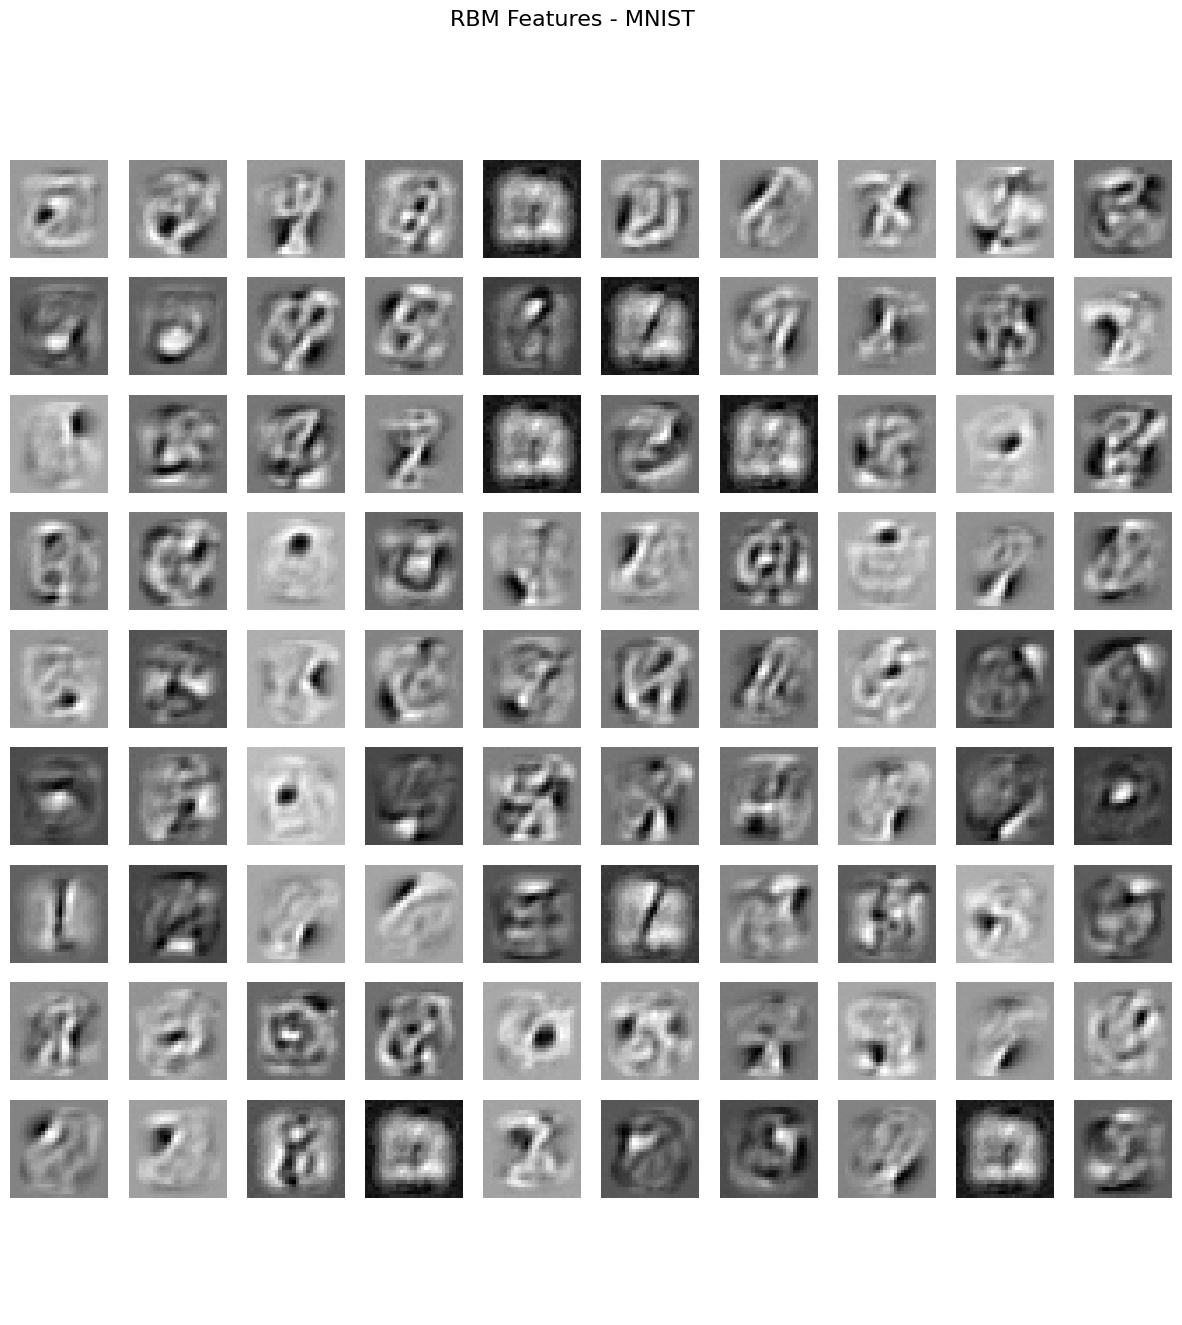

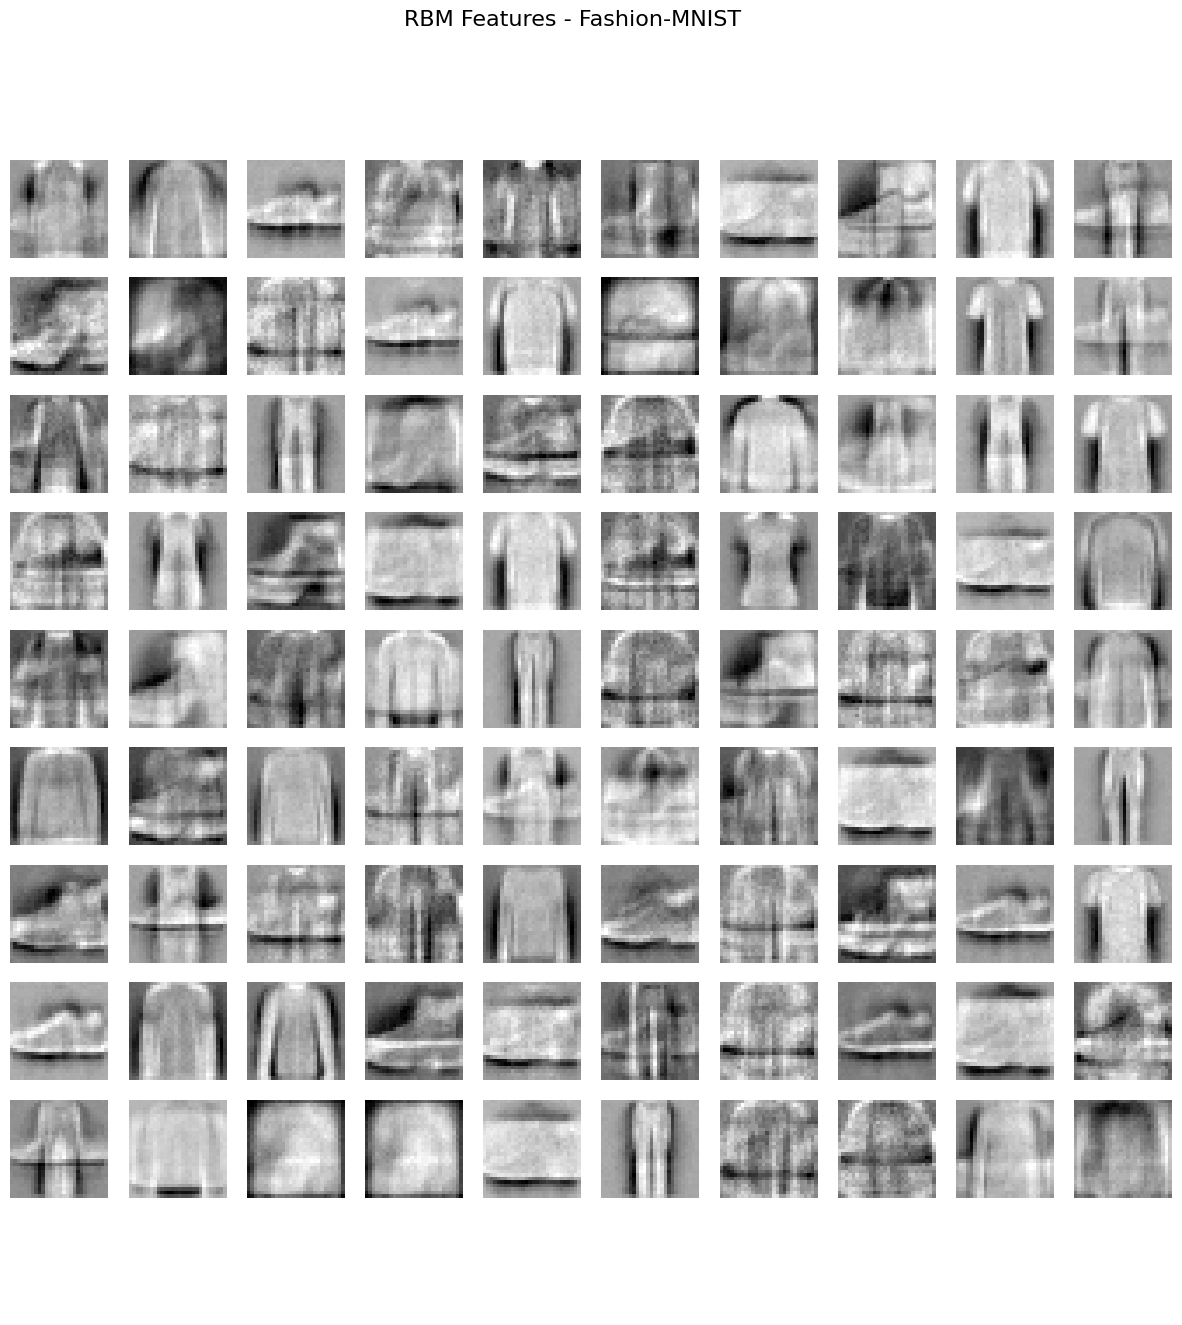

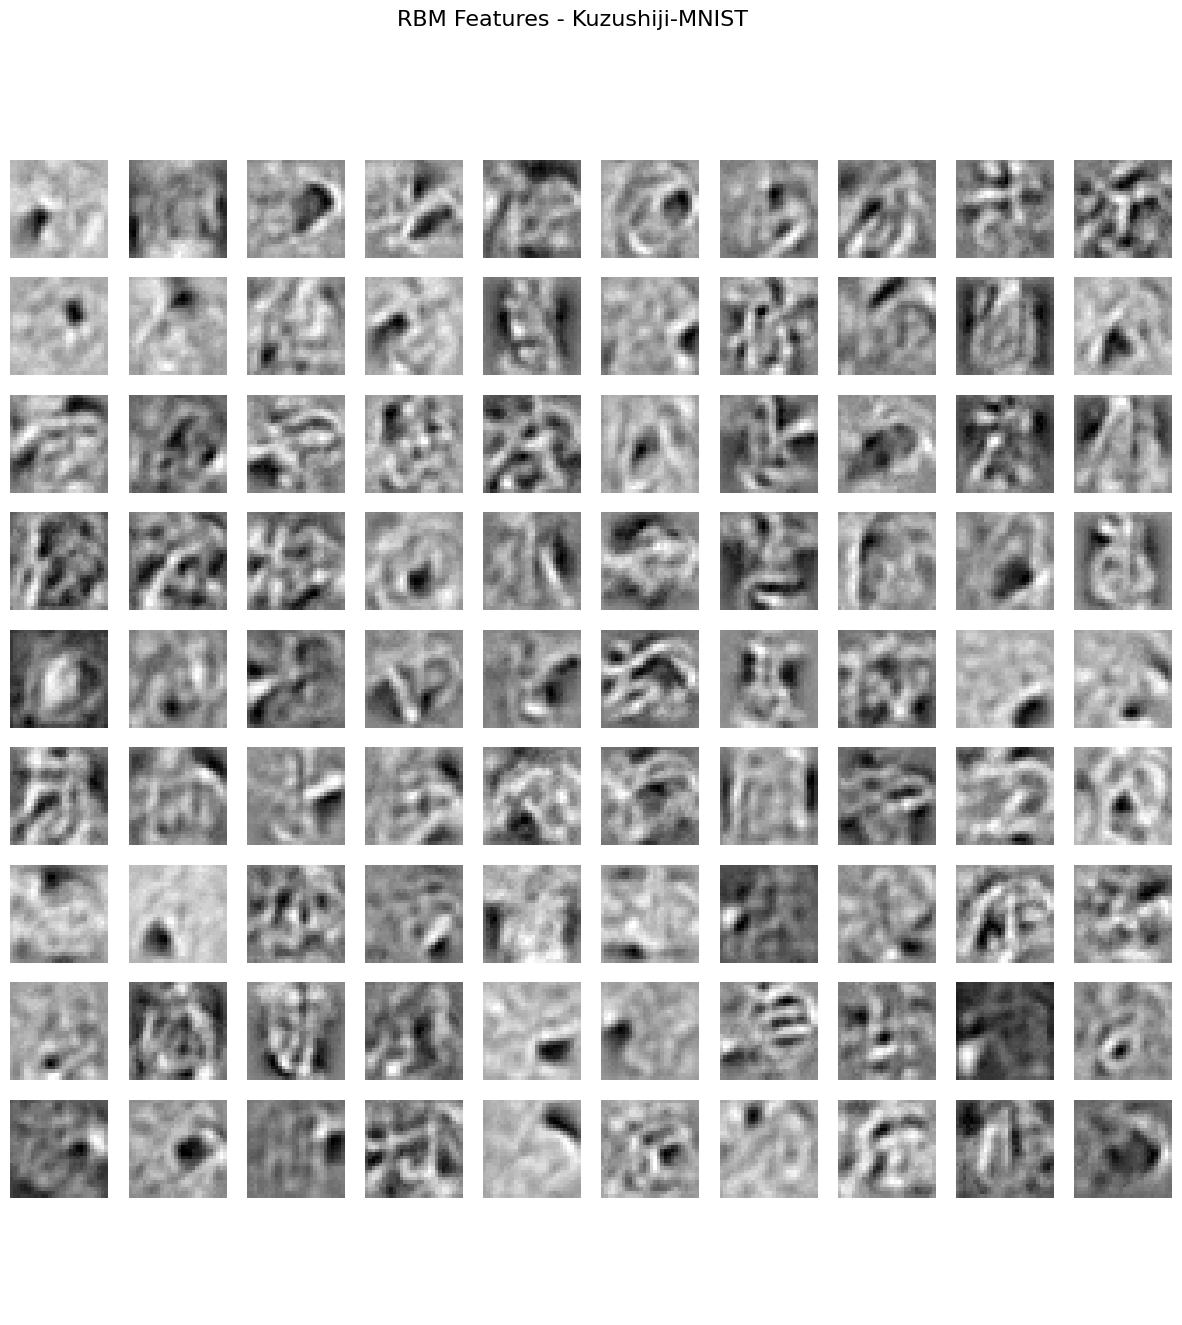

In [13]:
import matplotlib.pyplot as plt

def visualize_rbm_features(rbm, image_shape, title="RBM Features"):
    n_components = rbm.components_.shape[0]  
    n_cols = 10  
    n_rows = (n_components // n_cols) + 1 

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 1.5))
    fig.suptitle(title, fontsize=16)
    
    for i, ax in enumerate(axes.flat):
        if i < n_components:
            feature_image = rbm.components_[i].reshape(image_shape)
            ax.imshow(feature_image, cmap="gray")
            ax.axis('off')
        else:
            ax.axis('off')
    plt.show()

for dataset_name in ["MNIST", "Fashion-MNIST", "Kuzushiji-MNIST"]:
    model = trained_models[dataset_name]  
    rbm = model.named_steps['rbm']  

    visualize_rbm_features(
        rbm, 
        image_shape=(28, 28), 
        title=f"RBM Features - {dataset_name}"
    )

## Hierarchiczna ekstrakcja cech za pomocą Deep Belief Network

W niniejszej sekcji sprawdzimy, czy ustawianie wielu RBM w stos, czyli budowa modelu
głębokiego Deep Belief Network (i hierarchiczna ekstrakcja cech), pozwoli na popra-
wienie uzyskanych wcześniej wyników klasyfikacji. Podobnie jak w poprzednim zadaniu
eksperymenty należy wykonać dla wszystkich zbiorów danych wymienionych w punkcie
3, przy czym obowiązkowe są zbiory MNIST i Fashion-MNIST.


1. Skonfiguruj 3 RBM w ten sposób, że warstwa ekstrakcji cech (hidden layer ) RBM(i)
staje się warstwą wejściową (visible layer ) BRM(i + 1). RBMy trenowane są w
sekwencyjnie: 1, 2, 3.

2. Rozmiar warstwy ukrytej jest predefiniowany, przykładowo dla MNIST proponujemy kolejno: 256, 128, 64. Dla innych zbiorów danych rozmiary te możesz dopasować
empirycznie, przy czym nie jest wymagane zastosowanie wyszukiwania siatkowego
(duże wymagania obliczeniowe). Wartości pozostałych hiperparametrów mogą być
podobne jak w poprzednim zadaniu.

In [5]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def train_dbn(X_train, y_train, X_test, y_test, rbm_params_list, dataset_name):
    print(f"\n=== Trenowanie DBN dla: {dataset_name} ===")
    
    rbm1 = BernoulliRBM(**rbm_params_list[0])
    X_rbm1 = rbm1.fit_transform(X_train)
    print(f"RBM(1) wytrenowany. Kształt danych: {X_rbm1.shape}")
    
    rbm2 = BernoulliRBM(**rbm_params_list[1])
    X_rbm2 = rbm2.fit_transform(X_rbm1)
    print(f"RBM(2) wytrenowany. Kształt danych: {X_rbm2.shape}")
    
    rbm3 = BernoulliRBM(**rbm_params_list[2])
    X_rbm3 = rbm3.fit_transform(X_rbm2)
    print(f"RBM(3) wytrenowany. Kształt danych: {X_rbm3.shape}")
    
    classifier = LogisticRegression(max_iter=1000, random_state=42)
    classifier.fit(X_rbm3, y_train)
    print("Logistic Regression wytrenowany na danych wyjściowych RBM(3).")
    
    X_test_rbm1 = rbm1.transform(X_test)
    X_test_rbm2 = rbm2.transform(X_test_rbm1)
    X_test_rbm3 = rbm3.transform(X_test_rbm2)
    y_pred = classifier.predict(X_test_rbm3)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Dokładność: {accuracy:.4f}")
    print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))
    return accuracy

rbm_params_mnist = [
    {'n_components': 256, 'learning_rate': 0.05, 'batch_size': 20, 'n_iter': 50},
    {'n_components': 128, 'learning_rate': 0.05, 'batch_size': 20, 'n_iter': 50},
    {'n_components': 64,  'learning_rate': 0.05, 'batch_size': 20, 'n_iter': 50}
]

rbm_params_fashion_kuzushiji = [
    {'n_components': 128, 'learning_rate': 0.05, 'batch_size': 10, 'n_iter': 50},
    {'n_components': 64,  'learning_rate': 0.05, 'batch_size': 10, 'n_iter': 50},
    {'n_components': 32,  'learning_rate': 0.05, 'batch_size': 10, 'n_iter': 50}
]

datasets = {
    "MNIST": (mnist_train_data[:10000], mnist_train_labels[:10000], 
              mnist_test_data[:1000], mnist_test_labels[:1000], rbm_params_mnist),
    "Fashion-MNIST": (fashion_train_data[:10000], fashion_train_labels[:10000], 
                      fashion_test_data[:1000], fashion_test_labels[:1000], rbm_params_fashion_kuzushiji),
    "Kuzushiji-MNIST": (kuzushiji_train_data[:10000], kuzushiji_train_labels[:10000], 
                        kuzushiji_test_data[:1000], kuzushiji_test_labels[:1000], rbm_params_fashion_kuzushiji)
}

results = {}
for dataset_name, (X_train, y_train, X_test, y_test, rbm_params) in datasets.items():
    accuracy = train_dbn(X_train, y_train, X_test, y_test, rbm_params, dataset_name)
    results[dataset_name] = accuracy

print("\n=== Podsumowanie wyników DBN ===")
for dataset_name, acc in results.items():
    print(f"{dataset_name}: Dokładność = {acc:.4f}")


=== Trenowanie DBN dla: MNIST ===
RBM(1) wytrenowany. Kształt danych: (10000, 256)
RBM(2) wytrenowany. Kształt danych: (10000, 128)
RBM(3) wytrenowany. Kształt danych: (10000, 64)
Logistic Regression wytrenowany na danych wyjściowych RBM(3).
Dokładność: 0.9370
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        85
           1       1.00      0.99      1.00       126
           2       0.96      0.93      0.95       116
           3       0.89      0.95      0.92       107
           4       0.98      0.89      0.93       110
           5       0.97      0.90      0.93        87
           6       0.93      0.97      0.95        87
           7       0.96      0.92      0.94        99
           8       0.86      0.90      0.88        89
           9       0.85      0.94      0.89        94

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg

DBN uzyskał najwyższą dokładność dla MNIST (93,70%), skutecznie rozpoznając cyfry dzięki prostocie tego zbioru. Dla Fashion-MNIST dokładność wyniosła 72,20%, co wskazuje na trudności w rozpoznawaniu bardziej złożonych danych, zwłaszcza dla niektórych klas, jak sandały. W przypadku Kuzushiji-MNIST model osiągnął 69,00%, dobrze radząc sobie z prostszymi znakami, ale mając trudności z bardziej podobnymi klasami. Wyniki sugerują, że DBN działa najlepiej dla prostych zbiorów, a dla bardziej wymagających przydałaby się dalsza optymalizacja.

3. Porównaj wyniki klasyfikacji uzyskane z zastosowaniem regresji logistycznej, dla
poniższych wariantów ekstrakcji cech:
    - Baseline - regresja logistyczna na surowych pikselach
    - Pełna hierarchiczna ekstrakcja (wszystkie 3 RBMy)
    - Pierwszy RBM
    - Pierwszy i drugi RBM

In [6]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def train_logistic_regression(X_train, y_train, X_test, y_test, title):
    print(f"\n=== Trenowanie regresji logistycznej: {title} ===")
    classifier = LogisticRegression(max_iter=5000, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Dokładność: {accuracy:.4f}")
    print("Raport klasyfikacji:\n", classification_report(y_test, y_pred, zero_division=0))
    return accuracy

def compare_feature_extraction(X_train, y_train, X_test, y_test, rbm_params_list, dataset_name):
    print(f"\n=== Porównanie wyników dla: {dataset_name} ===")
    results = {}

    results["Baseline"] = train_logistic_regression(X_train, y_train, X_test, y_test, "Baseline - surowe piksele")

    rbm1 = BernoulliRBM(**rbm_params_list[0])
    X_rbm1 = rbm1.fit_transform(X_train)
    X_test_rbm1 = rbm1.transform(X_test)
    results["RBM(1)"] = train_logistic_regression(X_rbm1, y_train, X_test_rbm1, y_test, "Pierwszy RBM")

    rbm2 = BernoulliRBM(**rbm_params_list[1])
    X_rbm2 = rbm2.fit_transform(X_rbm1)
    X_test_rbm2 = rbm2.transform(X_test_rbm1)
    results["RBM(1) + RBM(2)"] = train_logistic_regression(X_rbm2, y_train, X_test_rbm2, y_test, "Pierwszy i drugi RBM")

    rbm3 = BernoulliRBM(**rbm_params_list[2])
    X_rbm3 = rbm3.fit_transform(X_rbm2)
    X_test_rbm3 = rbm3.transform(X_test_rbm2)
    results["Pełna hierarchia"] = train_logistic_regression(X_rbm3, y_train, X_test_rbm3, y_test, "Pełna hierarchiczna ekstrakcja")

    print("\n=== Wyniki klasyfikacji ===")
    for variant, acc in results.items():
        print(f"{variant}: Dokładność = {acc:.4f}")
    return results

rbm_params = [
    {'n_components': 256, 'learning_rate': 0.05, 'batch_size': 20, 'n_iter': 50}, 
    {'n_components': 128, 'learning_rate': 0.05, 'batch_size': 20, 'n_iter': 50},  
    {'n_components': 64,  'learning_rate': 0.05, 'batch_size': 20, 'n_iter': 50}   
]


datasets = {
    "MNIST": (mnist_train_data[:10000], mnist_train_labels[:10000], 
              mnist_test_data[:1000], mnist_test_labels[:1000]),
    "Fashion-MNIST": (fashion_train_data[:10000], fashion_train_labels[:10000], 
                      fashion_test_data[:1000], fashion_test_labels[:1000]),
    "Kuzushiji-MNIST": (kuzushiji_train_data[:10000], kuzushiji_train_labels[:10000], 
                        kuzushiji_test_data[:1000], kuzushiji_test_labels[:1000])
}

final_results = {}
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    results = compare_feature_extraction(X_train, y_train, X_test, y_test, rbm_params, dataset_name)
    final_results[dataset_name] = results

print("\n=== Podsumowanie wyników dla wszystkich zbiorów ===")
for dataset_name, results in final_results.items():
    print(f"\n{dataset_name}:")
    for variant, acc in results.items():
        print(f"{variant}: Dokładność = {acc:.4f}")


=== Porównanie wyników dla: MNIST ===

=== Trenowanie regresji logistycznej: Baseline - surowe piksele ===
Dokładność: 0.8790
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        85
           1       0.95      0.98      0.96       126
           2       0.88      0.79      0.84       116
           3       0.85      0.87      0.86       107
           4       0.91      0.89      0.90       110
           5       0.83      0.83      0.83        87
           6       0.92      0.91      0.91        87
           7       0.86      0.88      0.87        99
           8       0.82      0.87      0.84        89
           9       0.81      0.84      0.83        94

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000


=== Trenowanie regresji logistycznej: Pierwszy RBM ===
Dokładność: 0.9430
Raport klasyfikac

4. Czy ustawianie ekstraktorów RBM jest korzystne dla każdego ze zbiorów danych?
W jaki przypadku hierarchiczna ekstrakcja cech może być przydatna?

Ustawianie ekstraktorów RBM jest korzystne w przypadku zbiorów takich jak MNIST czy Kuzushiji-MNIST, gdzie poprawia dokładność względem baseline (np. dla MNIST pojedynczy RBM osiągnął 94,30% w porównaniu do 87,90% baseline). Jednak dla Fashion-MNIST pełna hierarchiczna ekstrakcja obniżyła wyniki (78,20% względem 84,60% baseline), co sugeruje, że złożone i zróżnicowane dane mogą nie być optymalnie reprezentowane przez kolejne warstwy RBM. Hierarchiczna ekstrakcja cech jest szczególnie przydatna, gdy dane mają hierarchiczną strukturę, gdzie zaawansowane cechy wynikają z prostszych. W przeciwnym razie może prowadzić do utraty informacji i pogorszenia wyników.

## Restricted Boltzmann Machines: implementacja, testy rekonstrukcji

1. Zaimplementuj RBM wraz z algorytmem trenowania Contrastive Divergence. 

In [15]:
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

class RBM:
    def __init__(self, visible_dim, hidden_dim, random_state=None):
        if random_state is not None:
            np.random.seed(random_state)
            
        self.visible_dim = visible_dim
        self.hidden_dim = hidden_dim
        
        bound = 4 * np.sqrt(6.0 / (visible_dim + hidden_dim))
        self.weights = np.random.uniform(-bound, bound, (visible_dim, hidden_dim))
        
        self.visible_bias = np.zeros(visible_dim)
        self.hidden_bias = np.zeros(hidden_dim)
        self.weight_snapshots = []
        
    def _sigmoid(self, x):
        return np.where(x >= 0, 
                       1 / (1 + np.exp(-x)),
                       np.exp(x) / (1 + np.exp(x)))
    
    def sample_hidden(self, visible_states):
        hidden_activations = np.dot(visible_states, self.weights) + self.hidden_bias
        hidden_probs = self._sigmoid(hidden_activations)
        hidden_states = (hidden_probs > np.random.rand(*hidden_probs.shape)).astype(np.float32)
        return hidden_probs, hidden_states
    
    def sample_visible(self, hidden_states):
        visible_activations = np.dot(hidden_states, self.weights.T) + self.visible_bias
        visible_probs = self._sigmoid(visible_activations)
        visible_states = (visible_probs > np.random.rand(*visible_probs.shape)).astype(np.float32)
        return visible_probs, visible_states
    
    def free_energy(self, visible_states):
        hidden_activations = np.dot(visible_states, self.weights) + self.hidden_bias
        visible_bias_term = np.dot(visible_states, self.visible_bias)
        hidden_term = np.sum(np.log1p(np.exp(hidden_activations)), axis=1)
        return -visible_bias_term - hidden_term
    
    def get_reconstruction_error(self, batch):
        hidden_probs, hidden_states = self.sample_hidden(batch)
        visible_probs, _ = self.sample_visible(hidden_states)
        return np.mean((batch - visible_probs) ** 2)
    
    def fit(self, X, epochs=10, batch_size=50, learning_rate=0.01, momentum=0.5, 
            weight_decay=0.0001, early_stopping_patience=5):
        n_samples = X.shape[0]
        
        weight_velocity = np.zeros_like(self.weights)
        vbias_velocity = np.zeros_like(self.visible_bias)
        hbias_velocity = np.zeros_like(self.hidden_bias)
        
        best_error = float('inf')
        patience_counter = 0
        
        for epoch in range(epochs):
            epoch_error = 0
            X = shuffle(X)
            
            for i in tqdm(range(0, n_samples, batch_size), desc=f"Epoch {epoch+1}/{epochs}"):
                batch = X[i:i + batch_size]
                actual_batch_size = batch.shape[0] 
                
                pos_hidden_probs, pos_hidden_states = self.sample_hidden(batch)
                pos_associations = np.dot(batch.T, pos_hidden_probs)
                
                neg_visible_probs, neg_visible_states = self.sample_visible(pos_hidden_states)
                neg_hidden_probs, _ = self.sample_hidden(neg_visible_probs)
                neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)
                
                weight_grad = (pos_associations - neg_associations) / actual_batch_size - weight_decay * self.weights
                vbias_grad = np.mean(batch - neg_visible_probs, axis=0)
                hbias_grad = np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
                
                weight_velocity = momentum * weight_velocity + learning_rate * weight_grad
                vbias_velocity = momentum * vbias_velocity + learning_rate * vbias_grad
                hbias_velocity = momentum * hbias_velocity + learning_rate * hbias_grad
                
                self.weights += weight_velocity
                self.visible_bias += vbias_velocity
                self.hidden_bias += hbias_velocity
                
                batch_error = self.get_reconstruction_error(batch)
                epoch_error += batch_error * actual_batch_size
            
            epoch_error /= n_samples
            print(f"Epoch {epoch+1} - Reconstruction error: {epoch_error:.6f}")
            
            self.weight_snapshots.append(self.weights.copy())
            
            if epoch_error < best_error:
                best_error = epoch_error
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping triggered after {epoch+1} epochs")
                    break
    
    def reconstruct(self, X):
        hidden_probs, hidden_states = self.sample_hidden(X)
        visible_probs, _ = self.sample_visible(hidden_states)
        return visible_probs
    
    def plot_weights(self, epoch=-1, n_weights=40, figsize=(10, 10)):
        plt.figure(figsize=figsize)
        weights = self.weight_snapshots[epoch]
        
        for i in range(min(n_weights, self.hidden_dim)):
            plt.subplot(8, 5, i + 1)
            plt.imshow(weights[:, i].reshape(int(np.sqrt(self.visible_dim)), -1), 
                      cmap='gray')
            plt.axis('off')
        
        plt.suptitle(f"RBM Weights at Epoch {epoch+1 if epoch >= 0 else len(self.weight_snapshots)}", 
                    fontsize=16)
        plt.tight_layout()
        plt.show()

    def get_hidden_features(self, X):
        hidden_probs, _ = self.sample_hidden(X)
        return hidden_probs


2. Wytrenuj RBM na zbiorze Fashion-MNIST (część treningowa) dla warstwy ukrytej (hidden dim) o rozmiarze 40. Zastosuj domyślne wartości parametrów metody fit().
3. Zwizualizuj jak zmieniają się wagi w kolejnych epokach treningu. W tym celi wywołuj metodę plot weights() w metodzie fit(). Przedstaw wyniki w formie animowanego pliku GIF. Zapisz obserwacje dotyczące postępów treningu.

In [33]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tqdm import tqdm
import imageio

(train_X, _), (_, _) = fashion_mnist.load_data()

train_X = train_X / 255.0  
train_X = train_X.reshape(-1, 28 * 28)  

rbm = RBM(visible_dim=28 * 28, hidden_dim=40)

gif_frames = []

def create_weight_image(epoch):
    fig, axes = plt.subplots(8, 5, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(40): 
        axes[i].imshow(rbm.weights[:, i].reshape(28, 28), cmap='gray', vmin=-0.1, vmax=0.1)
        axes[i].axis('off')
    plt.suptitle(f'RBM Weights - Epoch {epoch + 1}', fontsize=16)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    gif_frames.append(image)
    plt.close(fig)

rbm.fit(train_X, epochs=20, batch_size=100, learning_rate=0.01, momentum=0.5)

Epoch 1/20: 100%|██████████| 600/600 [00:12<00:00, 49.63it/s]


Epoch 1 - Reconstruction error: 0.066482


Epoch 2/20: 100%|██████████| 600/600 [00:12<00:00, 47.27it/s]


Epoch 2 - Reconstruction error: 0.051058


Epoch 3/20: 100%|██████████| 600/600 [00:12<00:00, 49.92it/s]


Epoch 3 - Reconstruction error: 0.048103


Epoch 4/20: 100%|██████████| 600/600 [00:11<00:00, 50.61it/s]


Epoch 4 - Reconstruction error: 0.046291


Epoch 5/20: 100%|██████████| 600/600 [00:12<00:00, 48.75it/s]


Epoch 5 - Reconstruction error: 0.045110


Epoch 6/20: 100%|██████████| 600/600 [00:11<00:00, 50.83it/s]


Epoch 6 - Reconstruction error: 0.044306


Epoch 7/20: 100%|██████████| 600/600 [00:12<00:00, 47.13it/s]


Epoch 7 - Reconstruction error: 0.043742


Epoch 8/20: 100%|██████████| 600/600 [00:11<00:00, 50.37it/s]


Epoch 8 - Reconstruction error: 0.043287


Epoch 9/20: 100%|██████████| 600/600 [00:11<00:00, 50.56it/s]


Epoch 9 - Reconstruction error: 0.042917


Epoch 10/20: 100%|██████████| 600/600 [00:12<00:00, 46.91it/s]


Epoch 10 - Reconstruction error: 0.042614


Epoch 11/20: 100%|██████████| 600/600 [00:11<00:00, 50.35it/s]


Epoch 11 - Reconstruction error: 0.042349


Epoch 12/20: 100%|██████████| 600/600 [00:11<00:00, 50.97it/s]


Epoch 12 - Reconstruction error: 0.042104


Epoch 13/20: 100%|██████████| 600/600 [00:12<00:00, 47.06it/s]


Epoch 13 - Reconstruction error: 0.041886


Epoch 14/20: 100%|██████████| 600/600 [00:12<00:00, 49.85it/s]


Epoch 14 - Reconstruction error: 0.041658


Epoch 15/20: 100%|██████████| 600/600 [00:12<00:00, 47.19it/s]


Epoch 15 - Reconstruction error: 0.041444


Epoch 16/20: 100%|██████████| 600/600 [00:12<00:00, 49.75it/s]


Epoch 16 - Reconstruction error: 0.041285


Epoch 17/20: 100%|██████████| 600/600 [00:11<00:00, 50.67it/s]


Epoch 17 - Reconstruction error: 0.041127


Epoch 18/20: 100%|██████████| 600/600 [00:12<00:00, 47.32it/s]


Epoch 18 - Reconstruction error: 0.040999


Epoch 19/20: 100%|██████████| 600/600 [00:11<00:00, 50.07it/s]


Epoch 19 - Reconstruction error: 0.040866


Epoch 20/20: 100%|██████████| 600/600 [00:12<00:00, 49.23it/s]

Epoch 20 - Reconstruction error: 0.040756


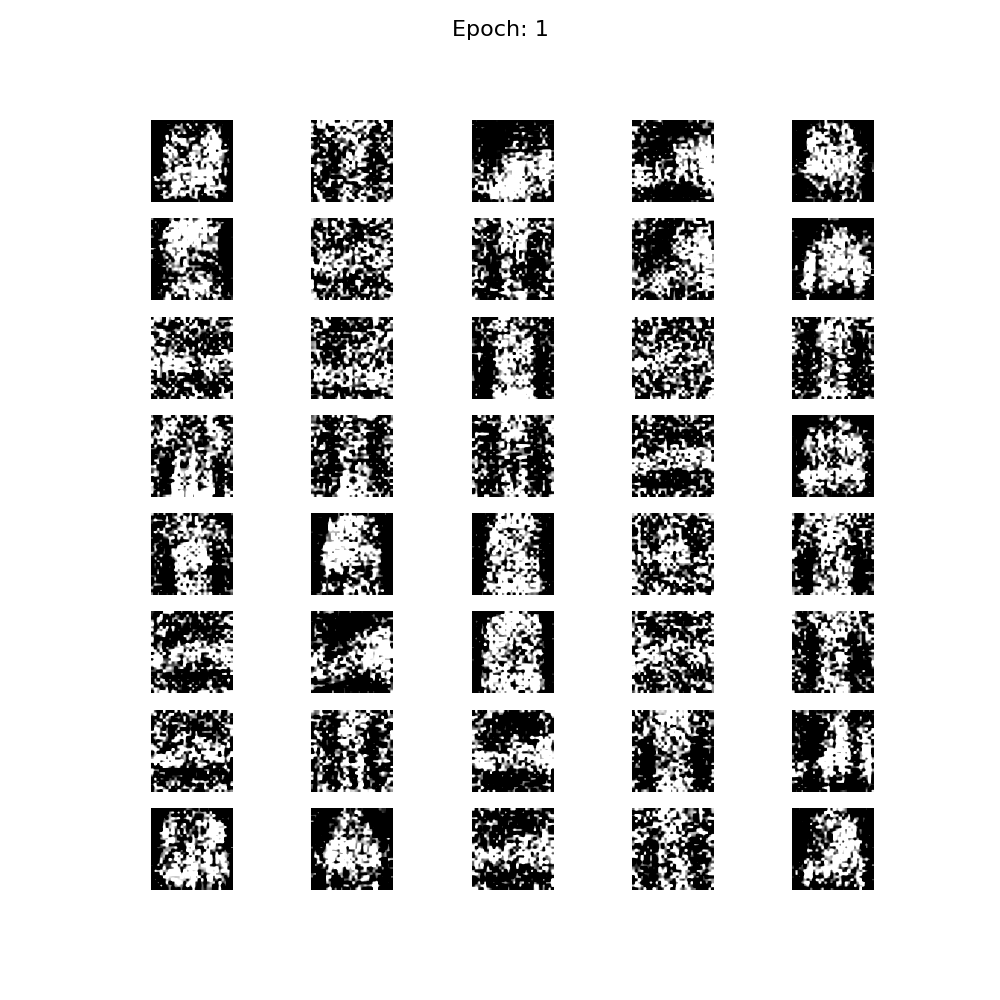

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
import imageio

animation_file = 'rbm_weights_animation.gif'

with imageio.get_writer(animation_file, mode='I', fps=2) as writer:
    for epoch, weights in enumerate(rbm.weight_snapshots):
        fig, axes = plt.subplots(8, 5, figsize=(10, 10))
        axes = axes.flatten()
        for i in range(40): 
            axes[i].imshow(weights[:, i].reshape(28, 28), cmap='gray', vmin=-0.1, vmax=0.1)
            axes[i].axis('off')
        plt.suptitle(f"Epoch: {epoch + 1}", fontsize=16)
        
        fig.canvas.draw()
        frame_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        frame_image = frame_image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        writer.append_data(frame_image)
        plt.close(fig)  

display(Image(filename=animation_file))

4. Wybierz 10 przykładów ze zbioru testowego (po jedynym dla każdej klasy). Następnie, użyj RBM do rekonstrukcji obrazu testowego. Porównaj otrzymaną rekonstrukcję z obrazem oryginalnym:
    - Przedstaw wizualizację: obraz oryginalny vs. obraz odtworzony na podstawie
wyuczonych wag RBM (dla każdej klasy)
    - Ilościowo: zastosuj Structural Similarity Index (SSIM).

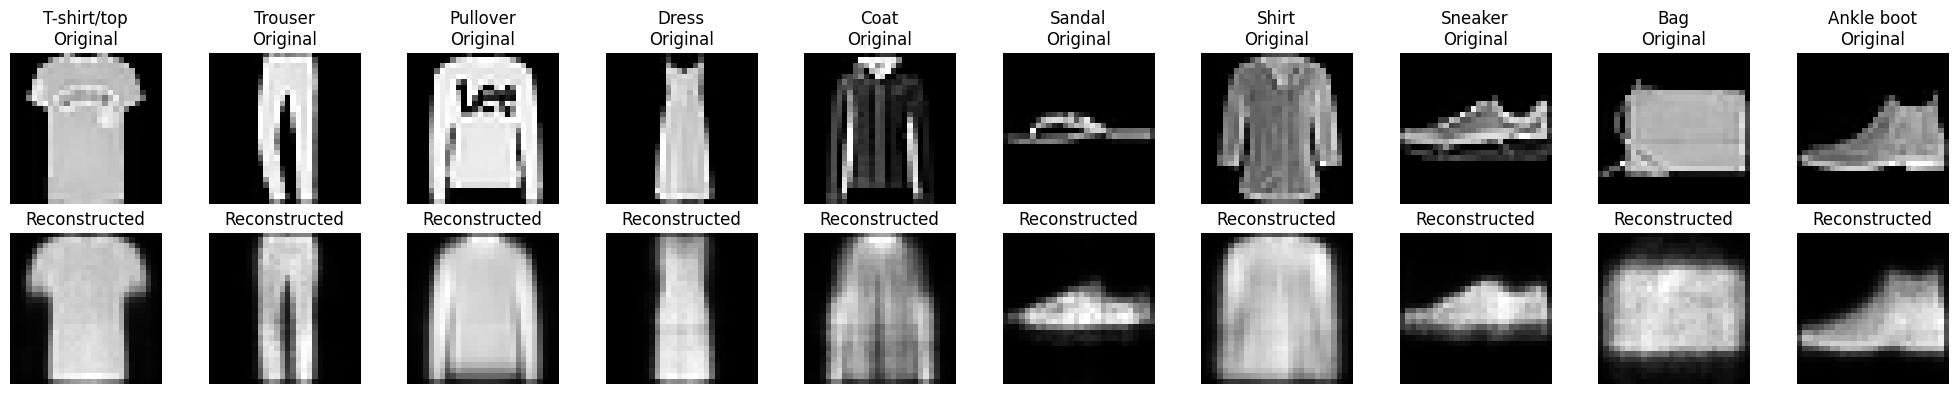


Structural Similarity Index (SSIM) dla każdej klasy:
T-shirt/top: 0.5365
Trouser: 0.7914
Pullover: 0.4389
Dress: 0.7022
Coat: 0.1547
Sandal: 0.4566
Shirt: 0.3652
Sneaker: 0.7232
Bag: 0.4881
Ankle boot: 0.6950

Statystyki SSIM:
Średni SSIM: 0.5352
Odchylenie standardowe SSIM: 0.1860
Min SSIM: 0.1547 (Coat)
Max SSIM: 0.7914 (Trouser)


In [35]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

(_, _), (test_X, test_y) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

test_X_prepared = test_X / 255.0

selected_indices = [np.where(test_y == i)[0][0] for i in range(10)]
original_images = test_X_prepared[selected_indices]

reconstructed_images = rbm.reconstruct(original_images.reshape(-1, 28*28))
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)

plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f'{class_names[i]}\nOriginal')
    plt.axis('off')
    
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

ssim_scores = []
print("\nStructural Similarity Index (SSIM) dla każdej klasy:")
print("=" * 50)

for i in range(10):
    score = ssim(original_images[i],
                 reconstructed_images[i],
                 data_range=reconstructed_images[i].max() - reconstructed_images[i].min())
    ssim_scores.append(score)
    print(f"{class_names[i]}: {score:.4f}")
    
print("\nStatystyki SSIM:")
print(f"Średni SSIM: {np.mean(ssim_scores):.4f}")
print(f"Odchylenie standardowe SSIM: {np.std(ssim_scores):.4f}")
print(f"Min SSIM: {np.min(ssim_scores):.4f} ({class_names[np.argmin(ssim_scores)]})")
print(f"Max SSIM: {np.max(ssim_scores):.4f} ({class_names[np.argmax(ssim_scores)]})")

5. Skomentuj uzyskane wyniki

Wyniki SSIM pokazują zróżnicowaną jakość rekonstrukcji przez model RBM. Średni wynik wyniósł 0.5352, co oznacza, że model częściowo uchwycił cechy obrazów, choć szczegóły nie zawsze zostały dobrze odwzorowane. Najlepszą rekonstrukcję uzyskano dla klasy "Trouser" (SSIM: 0.7914), co sugeruje, że model dobrze radzi sobie z prostymi kształtami. Najsłabszy wynik osiągnięto dla klasy "Coat" (SSIM: 0.1547), gdzie większa złożoność obrazów utrudniła rekonstrukcję. Wyniki wskazują, że model lepiej odwzorowuje proste wzorce, takie jak "Trouser" czy "Sneaker", ale ma trudności z bardziej złożonymi klasami, jak "Coat" czy "Shirt". Poprawę można osiągnąć, zwiększając liczbę jednostek ukrytych lub wydłużając trening modelu.

## Ekstrakcja cech za pomocą Autoencodera

W niniejszym zadaniu chcemy sprawdzić, czy ekstrakcja cech obrazu za pomocą różnego
typu Autoencoderów może poprawić wcześniej uzyskane wyniki klasyfikacji. Będziemy
rozważać zarówno proste Autoencodery, jak i modele głębokie złożone z DBN. Zadanie
ma charakter otwarty - można proponować w nim własne architektury (wykorzystujące np. architektury wariacyjne AE z poprzedniego laboratorium). Podobnie jak w poprzed-
nim zadaniu eksperymenty należy wykonać dla wszystkich zbiorów danych wymienionych
w punkcie 3, przy czym obowiązkowe są zbiory MNIST i Fashion-MNIST.

1. Wczytaj zbiór danych. Dokonaj skalowania cech do przedziału [0, 1] oraz konwersji
na tablice numpy (zarówno dane treningowe, jak i testowe).

In [1]:
import numpy as np
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor() 
])

data_dir = "./data"
mnist_train = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root=data_dir, train=False, download=True, transform=transform)

fashion_train = datasets.FashionMNIST(root=data_dir, train=True, download=True, transform=transform)
fashion_test = datasets.FashionMNIST(root=data_dir, train=False, download=True, transform=transform)

kuzushiji_train = datasets.KMNIST(root=data_dir, train=True, download=True, transform=transform)
kuzushiji_test = datasets.KMNIST(root=data_dir, train=False, download=True, transform=transform)

def dataset_to_numpy(dataset):
    images = np.array([np.array(img[0]).reshape(-1) for img in dataset])
    labels = np.array([label for _, label in dataset])
    return images, labels

x_train_mnist, y_train_mnist = dataset_to_numpy(mnist_train)
x_test_mnist, y_test_mnist = dataset_to_numpy(mnist_test)

x_train_fmnist, y_train_fmnist = dataset_to_numpy(fashion_train)
x_test_fmnist, y_test_fmnist = dataset_to_numpy(fashion_test)

x_train_kmnist, y_train_kmnist = dataset_to_numpy(kuzushiji_train)
x_test_kmnist, y_test_kmnist = dataset_to_numpy(kuzushiji_test)

print(f"MNIST: {x_train_mnist.shape}, {x_test_mnist.shape}")
print(f"Fashion-MNIST: {x_train_fmnist.shape}, {x_test_fmnist.shape}")
print(f"Kuzushiji-MNIST: {x_train_kmnist.shape}, {x_test_kmnist.shape}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38753596.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1152060.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10671239.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4606027.26it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 18371227.22it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272177.16it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5023554.15it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11479147.79it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 18165135/18165135 [00:13<00:00, 1318130.26it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 201966.10it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 865691.95it/s] 


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 12348957.15it/s]


Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw

MNIST: (60000, 784), (10000, 784)
Fashion-MNIST: (60000, 784), (10000, 784)
Kuzushiji-MNIST: (60000, 784), (10000, 784)


2. Zbuduj i wytrenuj prosty Autoencoder. Przykładowa konfiguracja prostego Autoencodera:
- Kodowanie: aktywacja ReLU
- Dekodowanie: aktywacja sigmoidalna
- Adam optimizer
- Loss function: binary crossentropy
- Encoding dimension: 196 (liczba ekstrachowanych cech)
- Liczba epok treningu: > 30

3. Przedstaw postępy trenowania wyświetlając wartości funkcji strat (loss) na zbiorach treningowych i testowych dla kolejnych epok.


Trening Autoencodera dla zbioru: MNIST
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2944 - val_loss: 0.1191
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1112 - val_loss: 0.0913
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0890 - val_loss: 0.0806
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0798 - val_loss: 0.0754
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0753 - val_loss: 0.0724
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0724 - val_loss: 0.0705
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0707 - val_loss: 0.0693
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0695 - val_loss: 0.0684
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0685 - val_loss: 0.0677
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0679 - val_loss: 0.0672
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0675 - val_loss: 0.0669
E

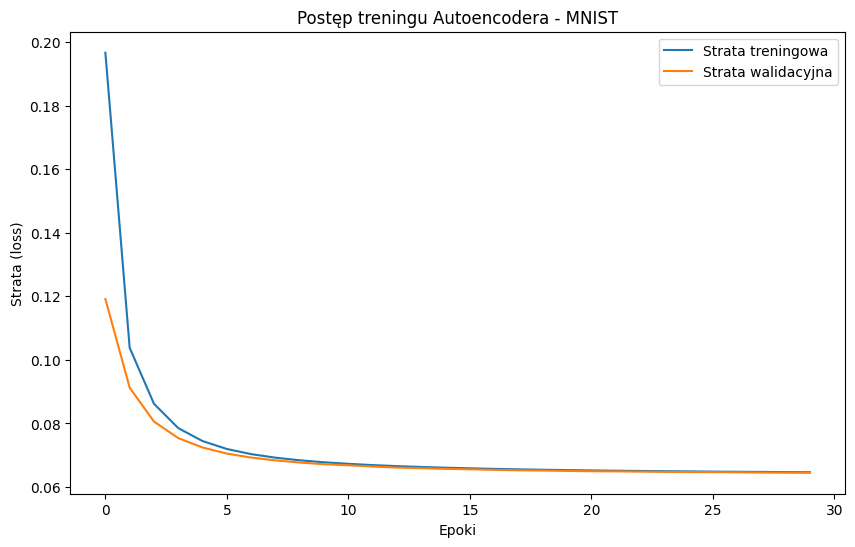

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Zakodowane cechy dla zbioru MNIST - Trening: (60000, 196), Test: (10000, 196)

Trening Autoencodera dla zbioru: Fashion-MNIST
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4308 - val_loss: 0.3072
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2985 - val_loss: 0.2871
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2815 - val_loss: 0.2786
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2746 - val_loss: 0.2745
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2712 - val_loss: 0.2718
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2695 - val_loss: 0.2695
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2666 - val_loss: 0.2677
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2641 - val_loss: 0.2664
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2635 - val_loss: 0.2651
Epoch 1

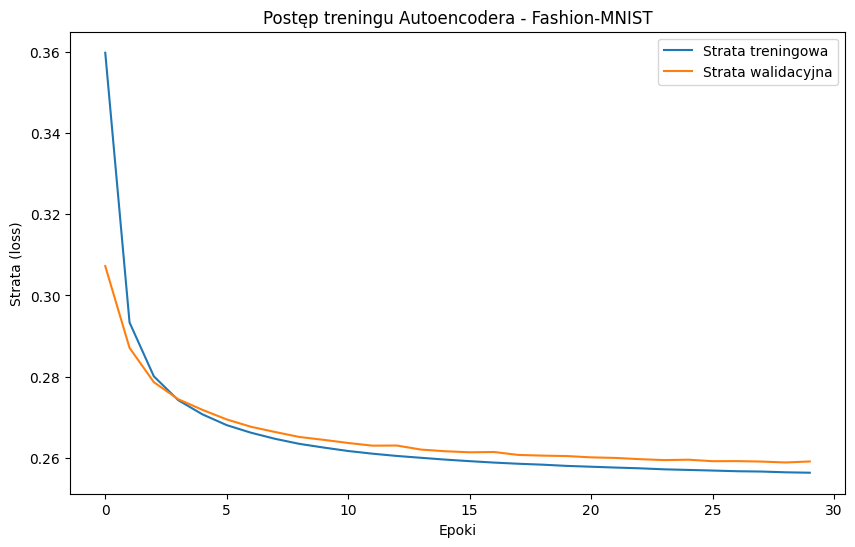

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Zakodowane cechy dla zbioru Fashion-MNIST - Trening: (60000, 196), Test: (10000, 196)

Trening Autoencodera dla zbioru: Kuzushiji-MNIST
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4140 - val_loss: 0.2302
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2009 - val_loss: 0.1771
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1628 - val_loss: 0.1568
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1472 - val_loss: 0.1471
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1399 - val_loss: 0.1417
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1354 - val_loss: 0.1381
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1327 - val_loss: 0.1359
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1309 - val_loss: 0.1340
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1296 - val_loss: 0.13

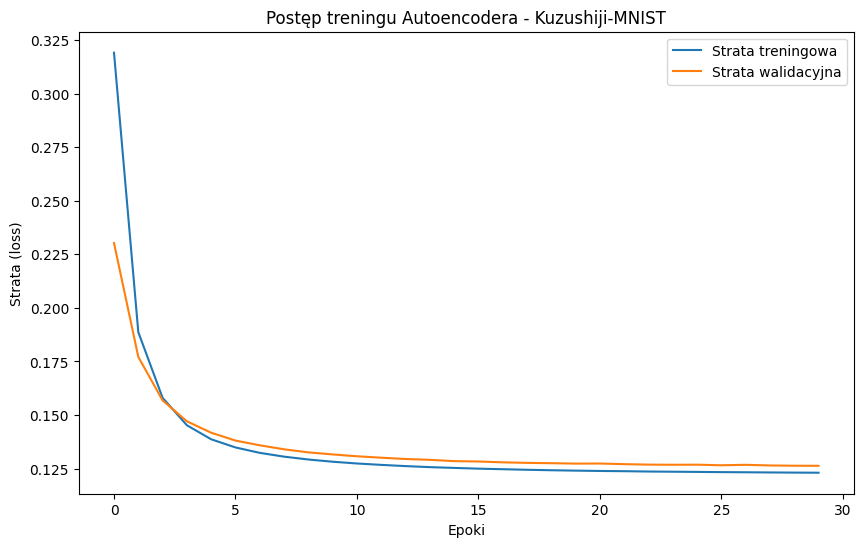

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Zakodowane cechy dla zbioru Kuzushiji-MNIST - Trening: (60000, 196), Test: (10000, 196)


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)  
    decoded = Dense(input_dim, activation='sigmoid')(encoded)    
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)  
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder, encoder

def train_and_plot_autoencoder(x_train, x_test, dataset_name, encoding_dim=196, epochs=30, batch_size=256):
    print(f"\nTrening Autoencodera dla zbioru: {dataset_name}")
    autoencoder, encoder = build_autoencoder(input_dim=784, encoding_dim=encoding_dim)
    
    history = autoencoder.fit(
        x_train, x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test),
        verbose=1
    )

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Strata treningowa')
    plt.plot(history.history['val_loss'], label='Strata walidacyjna')
    plt.xlabel('Epoki')
    plt.ylabel('Strata (loss)')
    plt.title(f'Postęp treningu Autoencodera - {dataset_name}')
    plt.legend()
    plt.show()

    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    print(f"Zakodowane cechy dla zbioru {dataset_name} - Trening: {encoded_train.shape}, Test: {encoded_test.shape}")
    return encoded_train, encoded_test

datasets = {
    'MNIST': (x_train_mnist, x_test_mnist),
    'Fashion-MNIST': (x_train_fmnist, x_test_fmnist),
    'Kuzushiji-MNIST': (x_train_kmnist, x_test_kmnist)
}

encoded_features = {}

for name, (x_train, x_test) in datasets.items():
    encoded_train, encoded_test = train_and_plot_autoencoder(x_train, x_test, name)
    encoded_features[name] = {'train': encoded_train, 'test': encoded_test}

4. Hiperparametry Autoencodera możesz dobrać wykorzystując wyszukiwanie siatkowe (grid search).

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np

def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder

def grid_search_autoencoder(x_train, x_test, dataset_name):
    param_grid = {
        'encoding_dim': [128, 196, 256],
        'batch_size': [128, 256],
        'epochs': [30, 50]
    }

    best_val_loss = float('inf')
    best_params = None
    best_autoencoder = None

    print(f"\nGrid Search dla zbioru: {dataset_name}")
    for params in ParameterGrid(param_grid):
        print(f"Testowanie parametrów: {params}")
        autoencoder = build_autoencoder(input_dim=784, encoding_dim=params['encoding_dim'])

        history = autoencoder.fit(
            x_train, x_train,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            validation_data=(x_test, x_test),
            verbose=0
        )

        val_loss = min(history.history['val_loss'])
        print(f"Validation Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = params
            best_autoencoder = autoencoder

    print(f"\nNajlepsze parametry dla zbioru {dataset_name}: {best_params}")
    print(f"Najniższa strata walidacyjna: {best_val_loss:.4f}")
    return best_autoencoder, best_params

datasets = {
    'MNIST': (x_train_mnist, x_test_mnist),
    'Fashion-MNIST': (x_train_fmnist, x_test_fmnist),
    'Kuzushiji-MNIST': (x_train_kmnist, x_test_kmnist)
}

best_models = {}
for name, (x_train, x_test) in datasets.items():
    best_autoencoder, best_params = grid_search_autoencoder(x_train, x_test, name)
    best_models[name] = {'model': best_autoencoder, 'params': best_params}


Grid Search dla zbioru: MNIST
Testowanie parametrów: {'batch_size': 128, 'encoding_dim': 128, 'epochs': 30}
Validation Loss: 0.0656
Testowanie parametrów: {'batch_size': 128, 'encoding_dim': 128, 'epochs': 50}
Validation Loss: 0.0654
Testowanie parametrów: {'batch_size': 128, 'encoding_dim': 196, 'epochs': 30}
Validation Loss: 0.0643
Testowanie parametrów: {'batch_size': 128, 'encoding_dim': 196, 'epochs': 50}
Validation Loss: 0.0641
Testowanie parametrów: {'batch_size': 128, 'encoding_dim': 256, 'epochs': 30}
Validation Loss: 0.0638
Testowanie parametrów: {'batch_size': 128, 'encoding_dim': 256, 'epochs': 50}
Validation Loss: 0.0637
Testowanie parametrów: {'batch_size': 256, 'encoding_dim': 128, 'epochs': 30}
Validation Loss: 0.0658
Testowanie parametrów: {'batch_size': 256, 'encoding_dim': 128, 'epochs': 50}
Validation Loss: 0.0655
Testowanie parametrów: {'batch_size': 256, 'encoding_dim': 196, 'epochs': 30}
Validation Loss: 0.0646
Testowanie parametrów: {'batch_size': 256, 'encodin

5. Korzystając w wytrenowanego Autoencodera wygeneruj nowe cechy dla zbioru
treningowego oraz zbioru testowego.

In [2]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)  
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder, encoder

best_params = {
    'MNIST': {'batch_size': 128, 'encoding_dim': 256, 'epochs': 50},
    'Fashion-MNIST': {'batch_size': 128, 'encoding_dim': 256, 'epochs': 50},
    'Kuzushiji-MNIST': {'batch_size': 256, 'encoding_dim': 256, 'epochs': 50}
}

datasets = {
    'MNIST': (x_train_mnist, x_test_mnist),
    'Fashion-MNIST': (x_train_fmnist, x_test_fmnist),
    'Kuzushiji-MNIST': (x_train_kmnist, x_test_kmnist)
}

encoded_features = {}

for name, (x_train, x_test) in datasets.items():
    print(f"\nGenerowanie cech dla zbioru: {name}")
    params = best_params[name]
    autoencoder, encoder = build_autoencoder(input_dim=784, encoding_dim=params['encoding_dim'])

    autoencoder.fit(
        x_train, x_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(x_test, x_test),
        verbose=1
    )

    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    encoded_features[name] = {'train': encoded_train, 'test': encoded_test}

    print(f"Nowe cechy dla {name} - Trening: {encoded_train.shape}, Test: {encoded_test.shape}")


Generowanie cech dla zbioru: MNIST
Epoch 1/50


I0000 00:00:1734649533.400097      73 service.cc:145] XLA service 0x7ece70008eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734649533.400151      73 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734649533.400155      73 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


100/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3710

I0000 00:00:1734649534.657477      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2229 - val_loss: 0.0896
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0853 - val_loss: 0.0746
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0738 - val_loss: 0.0701
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0702 - val_loss: 0.0681
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0682 - val_loss: 0.0670
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0664 - val_loss: 0.0658
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0660 - val_loss: 0.0655
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0656 - val_loss: 0.0652
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0655 - val_loss: 0.0650
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0652 - val_loss: 0.0649
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

Przykłady oryginalnych i zrekonstruowanych obrazów dla zbioru: MNIST
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


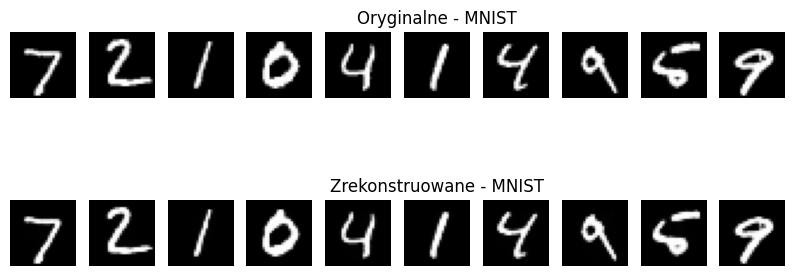

Przykłady oryginalnych i zrekonstruowanych obrazów dla zbioru: Fashion-MNIST
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


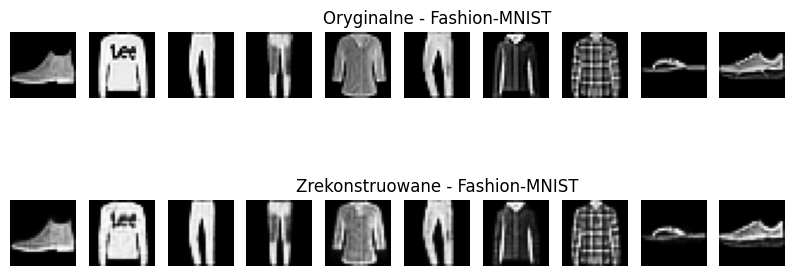

Przykłady oryginalnych i zrekonstruowanych obrazów dla zbioru: Kuzushiji-MNIST
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


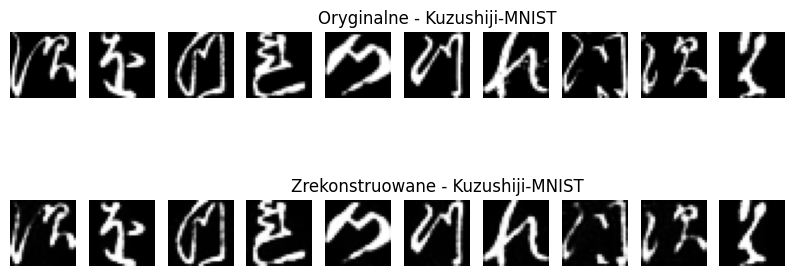

In [40]:
import matplotlib.pyplot as plt

def display_original_and_reconstructed(autoencoder, x_test, dataset_name, num_examples=10):
    reconstructed = autoencoder.predict(x_test[:num_examples])

    plt.figure(figsize=(10, 4))
    for i in range(num_examples):
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_examples // 2:
            plt.title(f"Oryginalne - {dataset_name}")

        plt.subplot(2, num_examples, i + 1 + num_examples)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_examples // 2:
            plt.title(f"Zrekonstruowane - {dataset_name}")
    plt.show()

for name, (x_train, x_test) in datasets.items():
    print(f"Przykłady oryginalnych i zrekonstruowanych obrazów dla zbioru: {name}")
    params = best_params[name]
    autoencoder, _ = build_autoencoder(input_dim=784, encoding_dim=params['encoding_dim'])

    autoencoder.fit(
        x_train, x_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        verbose=0
    )

    display_original_and_reconstructed(autoencoder, x_test, name)

Generowanie wizualizacji t-SNE...


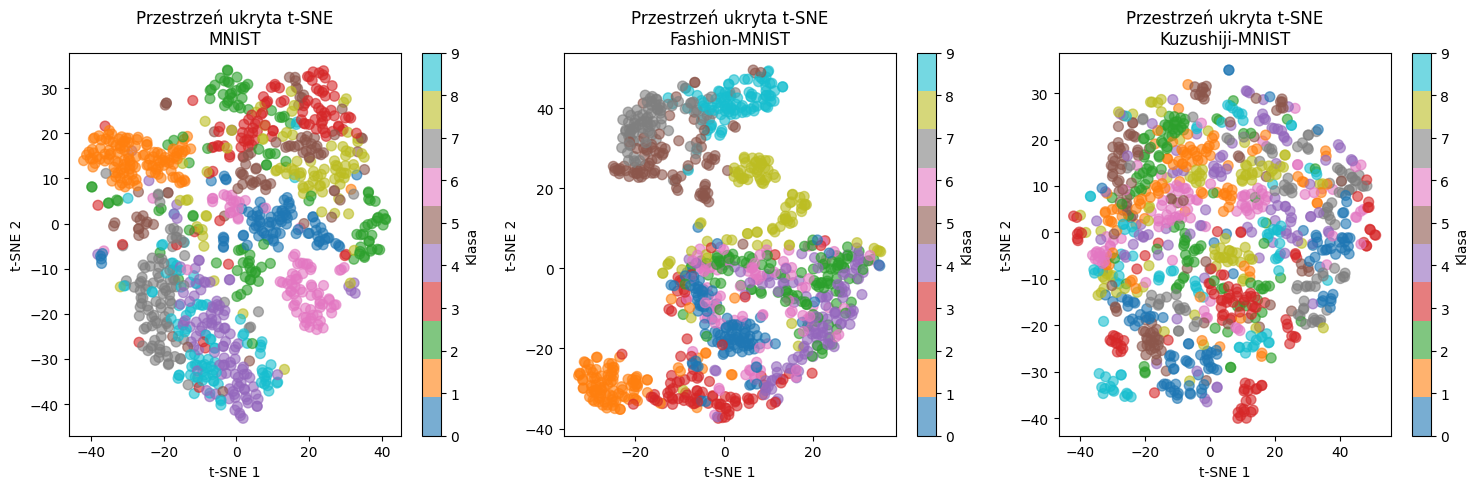

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def plot_latent_space_tsne(encoded_features, datasets_labels):
    plt.figure(figsize=(15, 5))
    
    for idx, (name, features) in enumerate(encoded_features.items()):
        plt.subplot(1, 3, idx + 1)
        
        sample_size = 1000
        features_sample = features['test'][:sample_size]
        labels_sample = datasets_labels[name]['test'][:sample_size]
        
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        encoded_2d = tsne.fit_transform(features_sample)
        
        scatter = plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], 
                            c=labels_sample, 
                            cmap='tab10',
                            alpha=0.6,
                            s=50)
        
        plt.colorbar(scatter, label='Klasa')
        plt.title(f'Przestrzeń ukryta t-SNE\n{name}')
        plt.xlabel('t-SNE 1')
        plt.ylabel('t-SNE 2')
    
    plt.tight_layout()
    plt.show()

datasets_labels = {
    'MNIST': {'test': y_test_mnist},
    'Fashion-MNIST': {'test': y_test_fmnist},
    'Kuzushiji-MNIST': {'test': y_test_kmnist}
}

print("Generowanie wizualizacji t-SNE...")
plot_latent_space_tsne(encoded_features, datasets_labels)

6. Wytrenuj klasyfikator LogisticRegression ustawiając solver=’newton-cg’. Dokonaj predykcji na zbiorze testowym oraz porównaj uzyskane wyniki z wynikami
z sekcji 5 i 6. Czy zmiana klasyfikatora na RandomForestClassifier poprawi
dokładność klasyfikacji? Przedstaw swój komentarz do całościowych wyników klasyfikacji.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate_classifiers(encoded_train, encoded_test, y_train, y_test, dataset_name):
    print(f"\nTrenowanie klasyfikatorów dla zbioru: {dataset_name}")

    log_reg = LogisticRegression(solver='newton-cg', max_iter=5000)
    log_reg.fit(encoded_train, y_train)
    y_pred_log_reg = log_reg.predict(encoded_test)
    acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
    print(f"Dokładność LogisticRegression: {acc_log_reg:.4f}")

    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(encoded_train, y_train)
    y_pred_rf = rf_clf.predict(encoded_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Dokładność RandomForestClassifier: {acc_rf:.4f}")

    if acc_rf > acc_log_reg:
        print("RandomForestClassifier osiągnął lepszą dokładność.")
    else:
        print("LogisticRegression osiągnął lepszą lub porównywalną dokładność.")

    return acc_log_reg, acc_rf

y_data = {
    'MNIST': (y_train_mnist, y_test_mnist),
    'Fashion-MNIST': (y_train_fmnist, y_test_fmnist),
    'Kuzushiji-MNIST': (y_train_kmnist, y_test_kmnist)
}

results = {}
for name in encoded_features:
    print(f"\n=== Klasyfikacja dla zbioru: {name} ===")
    encoded_train = encoded_features[name]['train']
    encoded_test = encoded_features[name]['test']
    y_train, y_test = y_data[name]

    acc_log_reg, acc_rf = train_and_evaluate_classifiers(encoded_train, encoded_test, y_train, y_test, name)
    results[name] = {'LogisticRegression': acc_log_reg, 'RandomForest': acc_rf}

print("\n=== Podsumowanie wyników klasyfikacji ===")
for name, result in results.items():
    print(f"{name}: LogisticRegression: {result['LogisticRegression']:.4f}, RandomForest: {result['RandomForest']:.4f}")



=== Klasyfikacja dla zbioru: MNIST ===

Trenowanie klasyfikatorów dla zbioru: MNIST


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Dokładność LogisticRegression: 0.9284
Dokładność RandomForestClassifier: 0.9343
RandomForestClassifier osiągnął lepszą dokładność.

=== Klasyfikacja dla zbioru: Fashion-MNIST ===

Trenowanie klasyfikatorów dla zbioru: Fashion-MNIST


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Dokładność LogisticRegression: 0.8580
Dokładność RandomForestClassifier: 0.8575
LogisticRegression osiągnął lepszą lub porównywalną dokładność.

=== Klasyfikacja dla zbioru: Kuzushiji-MNIST ===

Trenowanie klasyfikatorów dla zbioru: Kuzushiji-MNIST


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Dokładność LogisticRegression: 0.7177
Dokładność RandomForestClassifier: 0.7426
RandomForestClassifier osiągnął lepszą dokładność.

=== Podsumowanie wyników klasyfikacji ===
MNIST: LogisticRegression: 0.9284, RandomForest: 0.9343
Fashion-MNIST: LogisticRegression: 0.8580, RandomForest: 0.8575
Kuzushiji-MNIST: LogisticRegression: 0.7177, RandomForest: 0.7426


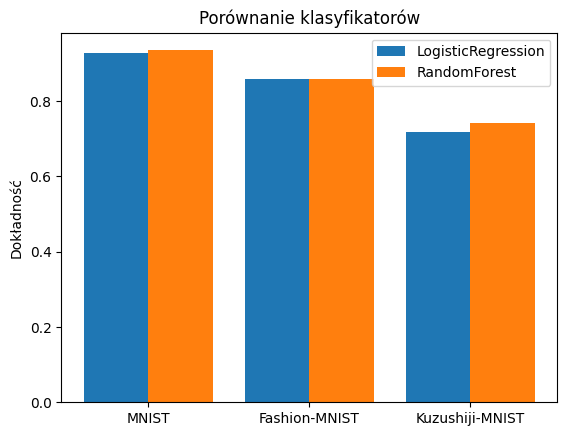

In [5]:
import matplotlib.pyplot as plt

names = list(results.keys())
log_reg_scores = [results[name]['LogisticRegression'] for name in names]
rf_scores = [results[name]['RandomForest'] for name in names]

x = range(len(names))
plt.bar(x, log_reg_scores, width=0.4, label='LogisticRegression', align='center')
plt.bar([p + 0.4 for p in x], rf_scores, width=0.4, label='RandomForest', align='center')
plt.xticks([p + 0.2 for p in x], names)
plt.ylabel('Dokładność')
plt.title('Porównanie klasyfikatorów')
plt.legend()
plt.show()

Porównując wyniki klasyfikacji, można zauważyć, że Logistic Regression z solverem newton-cg osiągnęła solidne rezultaty: 92.84% dla MNIST, 85.80% dla Fashion-MNIST i 71.77% dla Kuzushiji-MNIST. Zmiana klasyfikatora na RandomForestClassifier wpłynęła pozytywnie na wyniki dla MNIST (93.43%) i Kuzushiji-MNIST (74.26%), co wskazuje, że Random Forest lepiej radzi sobie z bardziej złożonymi wzorcami. Dla Fashion-MNIST różnica była minimalna – Random Forest osiągnął 85.75%, co jest niemal równoważne z Logistic Regression. Ogólnie rzecz biorąc, Logistic Regression dobrze sprawdza się przy prostych danych, takich jak MNIST, ale jej liniowy charakter ogranicza skuteczność w przypadku bardziej złożonych zbiorów danych, takich jak Fashion-MNIST czy Kuzushiji-MNIST. 

7. Zaproponuj własną architekturę głębokiego Autoencodera wykorzystującego filtry konwolucyjne. Nowe podejście do ekstrakcji cech powinno poprawić dokładność
klasyfikacji na wszystkich zbiorach danych.


Trening głębokiego konwolucyjnego Autoencodera dla zbioru: MNIST
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.2621 - val_loss: 0.1014
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0970 - val_loss: 0.0848
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0846 - val_loss: 0.0791
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0799 - val_loss: 0.0769
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0772 - val_loss: 0.0752
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0753 - val_loss: 0.0740
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0740 - val_loss: 0.0729
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0731 - val_loss: 0.0717
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0724 - val_loss: 0.0719
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0718 - val_loss: 0.0721
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 

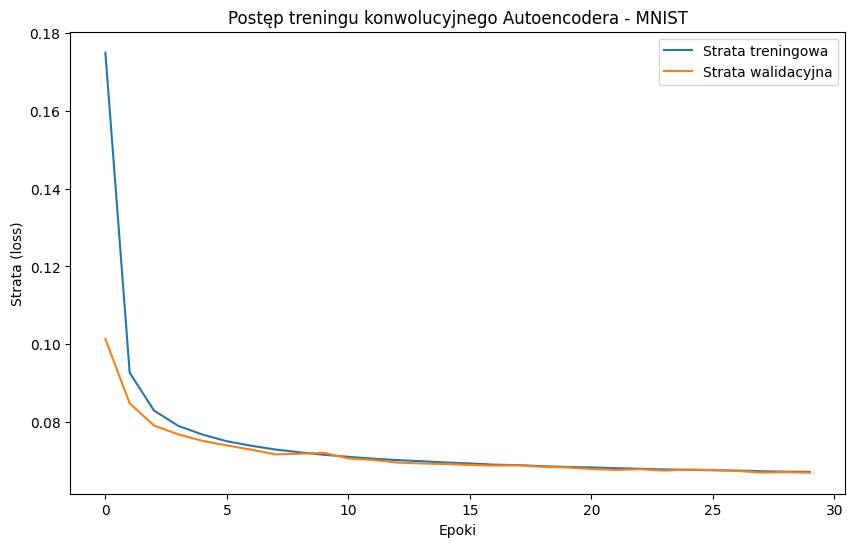

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Zakodowane cechy dla MNIST - Trening: (60000, 128), Test: (10000, 128)

Trening głębokiego konwolucyjnego Autoencodera dla zbioru: Fashion-MNIST
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.3952 - val_loss: 0.2922
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2864 - val_loss: 0.2822
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2766 - val_loss: 0.2762
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2733 - val_loss: 0.2732
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2698 - val_loss: 0.2709
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2684 - val_loss: 0.2696
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2676 - val_loss: 0.2685
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2652 - val_loss: 0.2675
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2647 - val_l

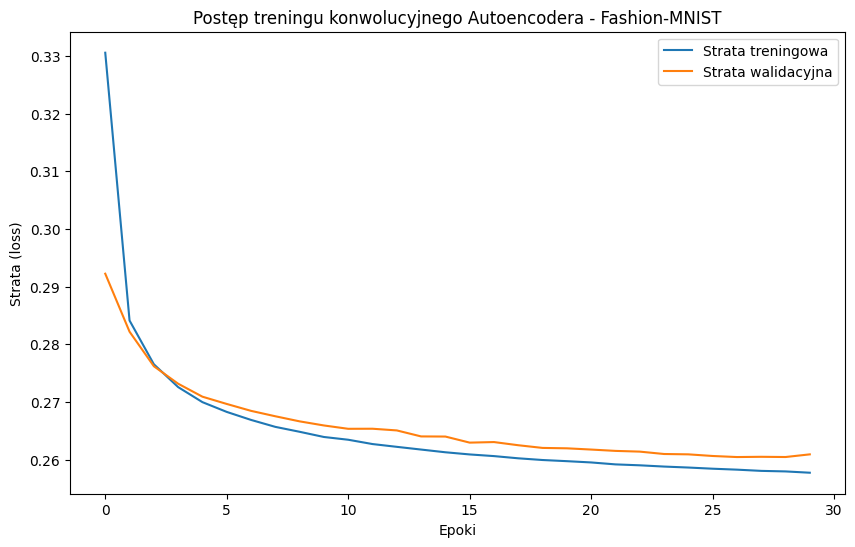

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Zakodowane cechy dla Fashion-MNIST - Trening: (60000, 128), Test: (10000, 128)

Trening głębokiego konwolucyjnego Autoencodera dla zbioru: Kuzushiji-MNIST
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.3832 - val_loss: 0.2210
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1918 - val_loss: 0.1790
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1660 - val_loss: 0.1664
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1552 - val_loss: 0.1582
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1490 - val_loss: 0.1540
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1450 - val_loss: 0.1495
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1424 - val_loss: 0.1464
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1399 - val_loss: 0.1455
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.13

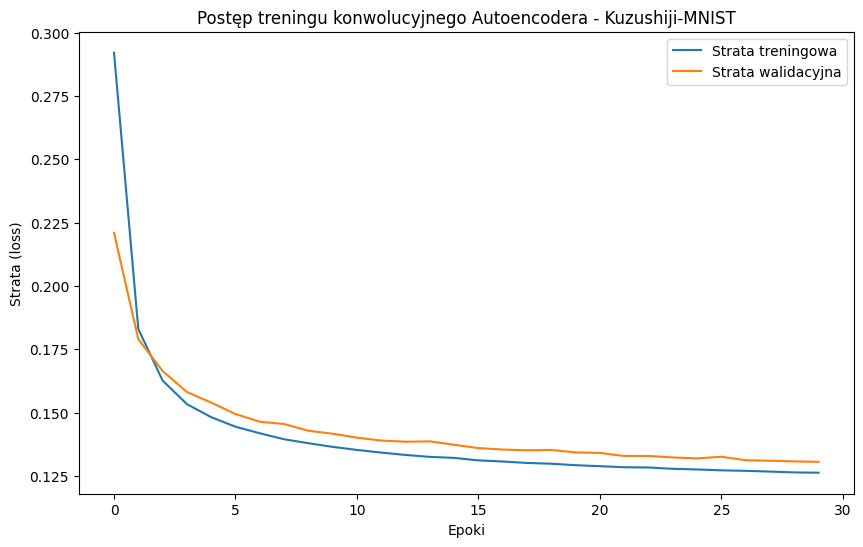

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Zakodowane cechy dla Kuzushiji-MNIST - Trening: (60000, 128), Test: (10000, 128)


In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

def build_conv_autoencoder():
    input_img = Input(shape=(28, 28, 1))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Flatten()(x)
    encoded = Dense(128, activation='relu')(x)  

    x = Dense(7 * 7 * 64, activation='relu')(encoded)
    x = Reshape((7, 7, 64))(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder, encoder

def train_conv_autoencoder(x_train, x_test, dataset_name, epochs=30, batch_size=256):
    print(f"\nTrening głębokiego konwolucyjnego Autoencodera dla zbioru: {dataset_name}")

    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    autoencoder, encoder = build_conv_autoencoder()
    history = autoencoder.fit(
        x_train, x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test),
        verbose=1
    )

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Strata treningowa')
    plt.plot(history.history['val_loss'], label='Strata walidacyjna')
    plt.title(f'Postęp treningu konwolucyjnego Autoencodera - {dataset_name}')
    plt.xlabel('Epoki')
    plt.ylabel('Strata (loss)')
    plt.legend()
    plt.show()

    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    print(f"Zakodowane cechy dla {dataset_name} - Trening: {encoded_train.shape}, Test: {encoded_test.shape}")
    return encoded_train, encoded_test

encoded_features_cae = {}
for name, (x_train, x_test) in datasets.items():
    encoded_train, encoded_test = train_conv_autoencoder(x_train, x_test, name, epochs=30, batch_size=256)
    encoded_features_cae[name] = {'train': encoded_train, 'test': encoded_test}

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

def evaluate_classifiers(encoded_train, encoded_test, y_train, y_test, dataset_name):
    results = {}

    log_reg = LogisticRegression(solver='newton-cg', max_iter=1000)
    log_reg.fit(encoded_train, y_train)
    y_pred_log_reg = log_reg.predict(encoded_test)
    acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
    results['LogisticRegression'] = acc_log_reg

    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(encoded_train, y_train)
    y_pred_rf = rf_clf.predict(encoded_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    results['RandomForest'] = acc_rf

    print(f"\nWyniki klasyfikacji dla {dataset_name}:")
    print(f"LogisticRegression: {acc_log_reg:.4f}")
    print(f"RandomForest: {acc_rf:.4f}")

    return results
    
y_data = {
    'MNIST': (y_train_mnist, y_test_mnist),
    'Fashion-MNIST': (y_train_fmnist, y_test_fmnist),
    'Kuzushiji-MNIST': (y_train_kmnist, y_test_kmnist)
}

comparison_results = []

for name in encoded_features:
    print(f"\n=== Klasyfikacja dla {name} - Prosty Autoencoder ===")
    acc_simple = evaluate_classifiers(
        encoded_features[name]['train'], encoded_features[name]['test'],
        y_data[name][0], y_data[name][1],
        f"{name} - Prosty AE"
    )

    print(f"\n=== Klasyfikacja dla {name} - Konwolucyjny Autoencoder ===")
    acc_cae = evaluate_classifiers(
        encoded_features_cae[name]['train'], encoded_features_cae[name]['test'],
        y_data[name][0], y_data[name][1],
        f"{name} - Konwolucyjny AE"
    )

    comparison_results.append({
        'Dataset': name,
        'LogisticRegression_SimpleAE': acc_simple['LogisticRegression'],
        'RandomForest_SimpleAE': acc_simple['RandomForest'],
        'LogisticRegression_CAE': acc_cae['LogisticRegression'],
        'RandomForest_CAE': acc_cae['RandomForest']
    })

results_df = pd.DataFrame(comparison_results)
print("\n=== Porównanie wyników klasyfikacji ===")
print(results_df)


=== Klasyfikacja dla MNIST - Prosty Autoencoder ===


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Wyniki klasyfikacji dla MNIST - Prosty AE:
LogisticRegression: 0.9284
RandomForest: 0.9343

=== Klasyfikacja dla MNIST - Konwolucyjny Autoencoder ===


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Wyniki klasyfikacji dla MNIST - Konwolucyjny AE:
LogisticRegression: 0.9621
RandomForest: 0.9603

=== Klasyfikacja dla Fashion-MNIST - Prosty Autoencoder ===


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Wyniki klasyfikacji dla Fashion-MNIST - Prosty AE:
LogisticRegression: 0.8580
RandomForest: 0.8575

=== Klasyfikacja dla Fashion-MNIST - Konwolucyjny Autoencoder ===


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Wyniki klasyfikacji dla Fashion-MNIST - Konwolucyjny AE:
LogisticRegression: 0.8630
RandomForest: 0.8765

=== Klasyfikacja dla Kuzushiji-MNIST - Prosty Autoencoder ===


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Wyniki klasyfikacji dla Kuzushiji-MNIST - Prosty AE:
LogisticRegression: 0.7177
RandomForest: 0.7426

=== Klasyfikacja dla Kuzushiji-MNIST - Konwolucyjny Autoencoder ===


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Wyniki klasyfikacji dla Kuzushiji-MNIST - Konwolucyjny AE:
LogisticRegression: 0.7132
RandomForest: 0.8317

=== Porównanie wyników klasyfikacji ===
           Dataset  LogisticRegression_SimpleAE  RandomForest_SimpleAE  \
0            MNIST                       0.9284                 0.9343   
1    Fashion-MNIST                       0.8580                 0.8575   
2  Kuzushiji-MNIST                       0.7177                 0.7426   

   LogisticRegression_CAE  RandomForest_CAE  
0                  0.9621            0.9603  
1                  0.8630            0.8765  
2                  0.7132            0.8317  


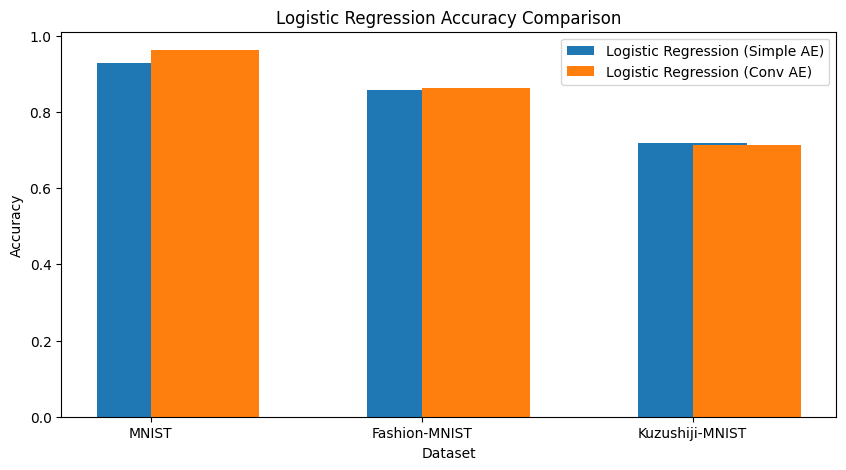

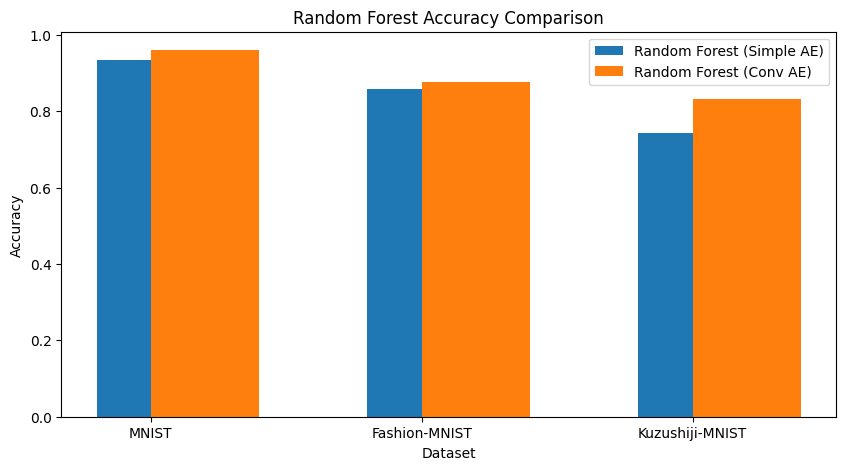

In [7]:
import matplotlib.pyplot as plt

def plot_comparison_results(results_df):
    plt.figure(figsize=(10, 5))
    plt.bar(results_df['Dataset'], results_df['LogisticRegression_SimpleAE'], width=0.4, label='Logistic Regression (Simple AE)', align='center')
    plt.bar(results_df['Dataset'], results_df['LogisticRegression_CAE'], width=0.4, label='Logistic Regression (Conv AE)', align='edge')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.title('Logistic Regression Accuracy Comparison')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(results_df['Dataset'], results_df['RandomForest_SimpleAE'], width=0.4, label='Random Forest (Simple AE)', align='center')
    plt.bar(results_df['Dataset'], results_df['RandomForest_CAE'], width=0.4, label='Random Forest (Conv AE)', align='edge')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Accuracy Comparison')
    plt.legend()
    plt.show()

plot_comparison_results(results_df)

Zastosowanie konwolucyjnego autoenkodera (Conv AE) zwykle poprawiało dokładność klasyfikacji, szczególnie przy użyciu Random Forest. Dla zbioru MNIST zauważalna była poprawa zarówno w Logistic Regression, jak i Random Forest, z większym wzrostem dokładności w przypadku Conv AE. Na Fashion-MNIST poprawa była mniejsza, ale wciąż widoczna, szczególnie w Random Forest.

W przypadku Kuzushiji-MNIST Conv AE znacząco poprawił wyniki tylko dla Random Forest (wzrost o 9%), natomiast dla Logistic Regression dokładność była nieco niższa po zastosowaniu Conv AE. Oznacza to, że Conv AE przynosi największe korzyści w bardziej złożonych modelach klasyfikacyjnych, ale jego skuteczność zależy od zbioru danych.